In [2]:
import re
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
#plt.style.use('seaborn')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA

In [3]:
# Load data 
#mta = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706.csv',encoding = "ISO-8859-1",error_bad_lines=False)
mta = pd.read_csv('C:/Users/keith/Desktop/Thinkful/mta_1706_1.csv',encoding = "ISO-8859-1",error_bad_lines=False)
pd.set_option('display.max_columns', 50)

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

b'Skipping line 2831078: expected 17 fields, saw 18\nSkipping line 2831884: expected 17 fields, saw 18\nSkipping line 2832778: expected 17 fields, saw 18\n'
b'Skipping line 2935466: expected 17 fields, saw 18\nSkipping line 2937968: expected 17 fields, saw 18\n'
b'Skipping line 2952504: expected 17 fields, saw 18\n'
b'Skipping line 2982958: expected 17 fields, saw 18\nSkipping line 2991335: expected 17 fields, saw 18\nSkipping line 3006710: expected 17 fields, saw 18\nSkipping line 3013361: expected 17 fields, saw 18\n'
b'Skipping line 3019557: expected 17 fields, saw 18\nSkipping line 3032671: expected 17 fields, saw 18\n'
b'Skipping line 3068454: expected 17 fields, saw 18\nSkipping line 3079236: expected 17 fields, saw 18\n'
b'Skipping line 3081942: expected 17 fields, saw 18\nSkipping line 3095240: expected 17 fields, saw 18\n'
b'Skipping line 3166450: expected 17 fields, saw 18\nSkipping line 3178126: expected 17 fields, saw 18\n'
b'Skipping line 3192452: expected 17 fields, saw 1

b'Skipping line 5278636: expected 17 fields, saw 18\n'
b'Skipping line 5389023: expected 17 fields, saw 18\nSkipping line 5393062: expected 17 fields, saw 18\n'
b'Skipping line 5410409: expected 17 fields, saw 18\n'
b'Skipping line 5444054: expected 17 fields, saw 18\n'
b'Skipping line 5496628: expected 17 fields, saw 18\nSkipping line 5496629: expected 17 fields, saw 18\n'
b'Skipping line 5510776: expected 17 fields, saw 18\n'
b'Skipping line 5548626: expected 17 fields, saw 18\nSkipping line 5551773: expected 17 fields, saw 18\nSkipping line 5556312: expected 17 fields, saw 18\nSkipping line 5570453: expected 17 fields, saw 18\n'
b'Skipping line 5577387: expected 17 fields, saw 18\nSkipping line 5580723: expected 17 fields, saw 18\nSkipping line 5582075: expected 17 fields, saw 18\nSkipping line 5596334: expected 17 fields, saw 18\nSkipping line 5602325: expected 17 fields, saw 18\n'
b'Skipping line 5606005: expected 17 fields, saw 18\nSkipping line 5621782: expected 17 fields, saw 1

In [4]:
#mta.to_csv('C:/Users/keith/Desktop/Thinkful/MTA_UPDATED.csv')

In [5]:
mta = mta.sample(frac=.02, random_state=20)
len(mta)

134609

# Data Description

In [6]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [7]:
 mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134609 entries, 249431 to 732369
Data columns (total 17 columns):
RecordedAtTime               134609 non-null object
DirectionRef                 134609 non-null int64
PublishedLineName            134609 non-null object
OriginName                   133313 non-null object
OriginLat                    133313 non-null float64
OriginLong                   133313 non-null float64
DestinationName              134609 non-null object
DestinationLat               134412 non-null float64
DestinationLong              134412 non-null float64
VehicleRef                   134609 non-null object
VehicleLocation.Latitude     134609 non-null float64
VehicleLocation.Longitude    134609 non-null float64
NextStopPointName            134472 non-null object
ArrivalProximityText         134472 non-null object
DistanceFromStop             134472 non-null float64
ExpectedArrivalTime          116919 non-null object
ScheduledArrivalTime         131110 non-null o

In [8]:
mta.shape

(134609, 17)

# Data cleansing

In [9]:
mta.duplicated().sum()

0

In [10]:
#pd.set_option('display.max_columns', None) # disables trucated columns 
#pd.set_option('display.max_rows', None) # disables trucated rows
mta.head()   

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
249431,2017-06-02 00:05:00,1,Q17,138 ST/37 AV,40.761806,-73.829559,JAMAICA ARCHER AV,40.704933,-73.793320,NYCT_8442,40.712529,-73.784314,HILLSIDE AV/EDGERTON BL,approaching,128.0,NaN,23:58:34
5083624,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,0.9 miles away,1427.0,2017-06-23 16:26:00,16:26:16
2001707,2017-06-09 17:38:05,1,Bx9,NaN,NaN,NaN,WEST FARMS,40.840641,-73.879807,NYCT_1214,40.879992,-73.904038,BROADWAY/W 231 ST,approaching,120.0,2017-06-09 17:39:19,NaN
2315680,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,< 1 stop away,154.0,2017-06-11 15:11:24,14:59:05
2230060,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,approaching,104.0,2017-06-10 22:20:58,22:21:22


In [11]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime'],
      dtype='object')

In [12]:
mta.columns=['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime']

In [13]:
mta.isnull().sum()

RecordedAtTime              0
DirectionRef                0
PublishedLineName           0
OriginName               1296
OriginLat                1296
OriginLong               1296
DestinationName             0
DestinationLat            197
DestinationLong           197
VehicleRef                  0
VehicleLocation_Lat         0
VehicleLocation_Long        0
NextStopPointName         137
ArrivalProximityText      137
DistanceFromStop          137
ExpectedArrivalTime     17690
ScheduledArrivalTime     3499
dtype: int64

In [14]:
mta.isnull().sum()/mta.isnull().count()

RecordedAtTime          0.000000
DirectionRef            0.000000
PublishedLineName       0.000000
OriginName              0.009628
OriginLat               0.009628
OriginLong              0.009628
DestinationName         0.000000
DestinationLat          0.001463
DestinationLong         0.001463
VehicleRef              0.000000
VehicleLocation_Lat     0.000000
VehicleLocation_Long    0.000000
NextStopPointName       0.001018
ArrivalProximityText    0.001018
DistanceFromStop        0.001018
ExpectedArrivalTime     0.131418
ScheduledArrivalTime    0.025994
dtype: float64

We need to drop the rows with missing arrival times. It is usless to us if we can't find the bus is late or not.

In [15]:
mta = mta[mta.ExpectedArrivalTime.isnull()==False]  
mta.isnull().sum()

RecordedAtTime             0
DirectionRef               0
PublishedLineName          0
OriginName              1109
OriginLat               1109
OriginLong              1109
DestinationName            0
DestinationLat           150
DestinationLong          150
VehicleRef                 0
VehicleLocation_Lat        0
VehicleLocation_Long       0
NextStopPointName          0
ArrivalProximityText       0
DistanceFromStop           0
ExpectedArrivalTime        0
ScheduledArrivalTime    1109
dtype: int64

In [16]:
mta = mta[mta.ScheduledArrivalTime.isnull()==False]
mta.isnull().sum()

RecordedAtTime          0
DirectionRef            0
PublishedLineName       0
OriginName              0
OriginLat               0
OriginLong              0
DestinationName         0
DestinationLat          0
DestinationLong         0
VehicleRef              0
VehicleLocation_Lat     0
VehicleLocation_Long    0
NextStopPointName       0
ArrivalProximityText    0
DistanceFromStop        0
ExpectedArrivalTime     0
ScheduledArrivalTime    0
dtype: int64

In [17]:
# reindex dataset
mta.index = range(len(mta.index))

That took care of all of our null values, that we can tell anyway.

Next we need to create a target variable. We are trying to predict if a bus is going to be late or not so we will convert the time rows in to manageable data and the find the difference in times.

In [18]:
mta.loc[list(np.where(mta.ScheduledArrivalTime=='24:00:00')[0]),'ScheduledArrivalTime'] = '00:00:01'
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_timedelta(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)

mta['ExpectedArrivalTime'] = pd.to_datetime(mta.ExpectedArrivalTime)
mta['ScheduledArrivalTime'] = mta.ExpectedArrivalTime.dt.date.astype('str') +' '+ mta.ScheduledArrivalTime.dt.time.astype('str')
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
mta['ScheduledArrivalTime'] = pd.to_datetime(mta.ScheduledArrivalTime)
index = mta[(mta.ScheduledArrivalTime.dt.hour==23) & (mta.ExpectedArrivalTime.dt.hour==00)].index
mta.loc[index,'ScheduledArrivalTime'] = mta.ScheduledArrivalTime + pd.DateOffset(days=-1)

mta.loc[list(np.where(mta.ExpectedArrivalTime>mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ExpectedArrivalTime -  mta.ScheduledArrivalTime).dt.minute 
mta.loc[list(np.where(mta.ExpectedArrivalTime<mta.ScheduledArrivalTime)[0]),'Time_delay'] = pd.to_datetime(mta.ScheduledArrivalTime - mta.ExpectedArrivalTime ).dt.minute*-1
mta.loc[list(np.where(mta.Time_delay.isna()==True)[0]),'Time_delay'] = 0

mta['Late_Bus'] = np.where(mta.Time_delay>7, 1, 0)

In [19]:
# create time of day feature
bins=[0, 600, 115900, 170000, 200000, 235959]
bin_names = ['night','morning','afternoon','evening','Night']
mta['time_of_day'] = pd.cut(pd.to_numeric(mta.ScheduledArrivalTime.dt.time.astype(str).str.replace(':','')), bins,labels=bin_names)
mta['time_of_day'] = mta['time_of_day'].str.lower()

In [20]:
mta['RecordedAtTime'] = pd.to_datetime(mta.RecordedAtTime)

In [21]:
# checking to make sure that time is only in the month of June
mta.ScheduledArrivalTime.dt.month.unique()

array([6, 5], dtype=int64)

In [22]:
mta.drop(list(np.where(mta.ScheduledArrivalTime.dt.month==5)[0]),axis='index',inplace=True)
# reindex dataset
mta.index = range(len(mta.index))
mta.ScheduledArrivalTime.dt.month.unique()

array([6], dtype=int64)

In [23]:
# test to see if it worked from a sample
mta.sample(frac=.001).head(10)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day
69387,2017-06-29 08:40:42,0,B41,E 70 ST/VETERANS AV,40.619934,-73.908707,LTD DNTWN BKLYN CADMAN PLZ via FLATBUSH,40.695408,-73.990784,NYCT_4231,40.685551,-73.978538,LIVINGSTON ST/NEVINS ST,< 1 stop away,365.0,2017-06-29 08:45:32,2017-06-29 08:27:20,18.0,1,morning
85753,2017-06-18 22:03:10,0,S79-SBS,MARSH AV/RING RD,40.583221,-74.161949,SELECT BUS SERVICE BAY RIDGE 86 ST STATN,40.622520,-74.028343,NYCT_4251,40.572429,-74.107702,HYLAN BL/MIDLAND AV,0.5 miles away,806.0,2017-06-18 22:06:30,2017-06-18 21:58:20,8.0,1,night
81747,2017-06-20 07:05:22,1,B41,CADMAN PLAZA WEST/JOHNSON ST,40.695534,-73.990829,BERGEN BCH VETERANS AV via FLATBSH,40.620052,-73.908203,NYCT_7361,40.650209,-73.958663,FLATBUSH AV/CHURCH AV,approaching,56.0,2017-06-20 07:05:39,2017-06-20 07:04:00,1.0,0,morning
56981,2017-06-09 11:47:14,1,Bx40,PENNYFIELD AV/FT SCHUYLER ENT,40.809174,-73.801765,RIVER PK TOWER via TREMONT,40.852402,-73.920105,NYCT_5763,40.840230,-73.879726,E TREMONT AV/BRYANT AV,< 1 stop away,201.0,2017-06-09 11:50:39,2017-06-09 11:46:02,4.0,0,morning
65227,2017-06-20 16:06:00,1,B41,CADMAN PLAZA WEST/JOHNSON ST,40.695534,-73.990829,LTD KINGS PLAZA via FLATBUSH,40.609211,-73.921516,NYCT_5064,40.608888,-73.921260,Flatbush Av/Av U,approaching,41.0,2017-06-20 16:06:13,2017-06-20 15:42:00,24.0,1,afternoon
16548,2017-06-24 22:52:50,0,Q84,ARCHER AV/153 ST,40.702095,-73.801735,LAURELTON 238 ST via 120 AV,40.679817,-73.729927,NYCT_8102,40.688891,-73.738343,120 AV/226 ST,approaching,116.0,2017-06-24 22:53:08,2017-06-24 22:52:00,1.0,0,night
63501,2017-06-12 12:11:56,0,M116,W 106 ST/BROADWAY,40.801155,-73.967575,E. HARLEM PALADINO AV XTOWN,40.797615,-73.931007,NYCT_6707,40.802989,-73.951973,W 116 ST/ADAM C POWELL BL,at stop,0.0,2017-06-12 12:12:21,2017-06-12 12:03:07,9.0,1,afternoon
41686,2017-06-26 11:54:34,0,Bx36,W 179 ST/BROADWAY,40.849113,-73.937752,SOUNDVIEW PUGSLEY AV,40.820507,-73.851631,NYCT_710,40.847696,-73.887952,E 180 ST/PROSPECT AV,< 1 stop away,163.0,2017-06-26 11:55:42,2017-06-26 11:51:55,3.0,0,morning
37661,2017-06-29 18:11:34,0,B26,CADMAN PZ W/TILLARY ST,40.695999,-73.990944,RIDGEWOOD TERM via HALSEY,40.699291,-73.910751,NYCT_3969,40.685110,-73.921105,HALSEY ST/HOWARD AV,approaching,90.0,2017-06-29 18:11:56,2017-06-29 18:14:01,-2.0,0,evening
21461,2017-06-16 09:09:15,0,Bx36,W 179 ST/BROADWAY,40.849113,-73.937752,SOUNDVIEW PUGSLEY AV,40.820507,-73.851631,NYCT_7710,40.834202,-73.874205,E 174 ST/FTELEY AV,< 1 stop away,159.0,2017-06-16 09:10:00,2017-06-16 09:03:34,6.0,0,morning


The conversion worked. We created a feature 'Time_delay' where the values are the minutes of delay ot the bus. Values that are greater than zero are the number of minutes past the scheduled arrival time. The values that are less that zero are the number of minutes the bus arrived ahead of schedule.

The 'Late_Bus' feature is labels a '1' for a bus who's arrival time is greater than 15 min past the scheduled arrival time and labels a '0' for anything under that time. This is our target

In [24]:
mta.Late_Bus.value_counts()

0    85510
1    30296
Name: Late_Bus, dtype: int64

    Next, "ArrivalProximityText" and "DistanceFromStop" are redundant variables so one can be dropped.

In [25]:
mta.drop("ArrivalProximityText",1,inplace=True)

In [26]:
# convert the categorical variables to the correct data type
columns = ['DirectionRef','PublishedLineName','OriginName',
           'DestinationName','VehicleRef','NextStopPointName']
for col in columns:
    mta[col] = mta[col].astype('category')

In [27]:
mta.Late_Bus.value_counts()

0    85510
1    30296
Name: Late_Bus, dtype: int64

In [28]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115806 entries, 0 to 115805
Data columns (total 19 columns):
RecordedAtTime          115806 non-null datetime64[ns]
DirectionRef            115806 non-null category
PublishedLineName       115806 non-null category
OriginName              115806 non-null category
OriginLat               115806 non-null float64
OriginLong              115806 non-null float64
DestinationName         115806 non-null category
DestinationLat          115806 non-null float64
DestinationLong         115806 non-null float64
VehicleRef              115806 non-null category
VehicleLocation_Lat     115806 non-null float64
VehicleLocation_Long    115806 non-null float64
NextStopPointName       115806 non-null category
DistanceFromStop        115806 non-null float64
ExpectedArrivalTime     115806 non-null datetime64[ns]
ScheduledArrivalTime    115806 non-null datetime64[ns]
Time_delay              115806 non-null float64
Late_Bus                115806 non-null int32


# Exploratory Data Analysis

In [29]:
mta.describe()

,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus
count,115806.000000,115806.000000,115806.000000,115806.000000,115806.000000,115806.000000,115806.000000,115806.000000,115806.000000
mean,40.729658,-73.931274,40.728954,-73.931725,40.728719,-73.930994,244.118232,5.331442,0.261610
std,0.090263,0.093708,0.090452,0.094687,0.086798,0.088389,1037.743906,9.166907,0.439513
min,40.506882,-74.248062,40.508106,-74.246948,40.502898,-74.252305,0.000000,-59.000000,0.000000
25%,40.660664,-73.987373,40.660854,-73.988831,40.659412,-73.979025,32.000000,0.000000,0.000000
50%,40.715233,-73.932449,40.713356,-73.932266,40.723281,-73.936394,104.000000,3.000000,0.000000
75%,40.809174,-73.879936,40.809078,-73.878326,40.804030,-73.883361,212.000000,8.000000,1.000000
max,40.912365,-73.701866,40.912376,-73.701385,40.912340,-73.701492,33604.000000,59.000000,1.000000


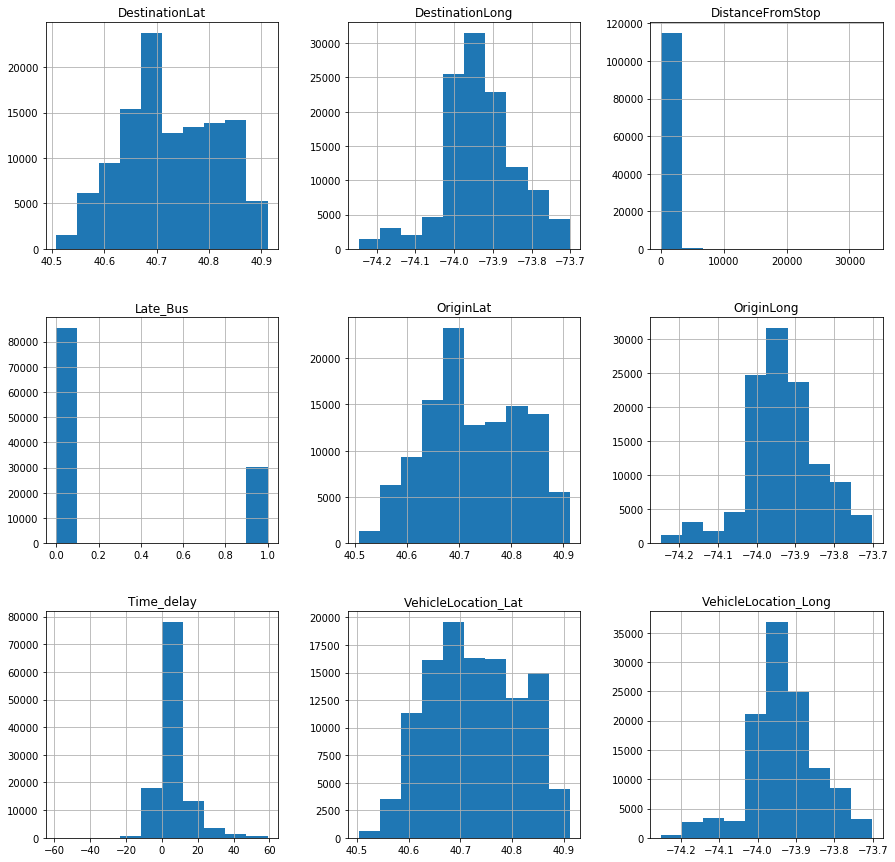

In [30]:
mta.hist(figsize=(15,15))
plt.show()

From the histograms of our continuous features we can see that we have a very unbalanced target, which would be expected. There should definetly be more on-time busses that late ones. From here I want to look at the continuous variables for against the target.
 

In [31]:
# Test of the mean distance between stops of late and on-time busses
Late_Bus_dist = mta[mta.Late_Bus==1] 
On_Time_Bus_dist = mta[mta.Late_Bus==0] 
print(stats.ttest_ind(Late_Bus_dist.DistanceFromStop,On_Time_Bus_dist.DistanceFromStop),'\n')

# calculate correlation distance from stop and late busses
print('Correlation of distance from stops and late busses \n',mta.DistanceFromStop.corr(mta.Late_Bus))
print()
print(stats.ttest_ind(Late_Bus_dist.Time_delay,On_Time_Bus_dist.Time_delay),'\n')

# calculate correlation distance from stop and late busses
print('Correlation of time delays and late busses \n',mta.Time_delay.corr(mta.Late_Bus))

Ttest_indResult(statistic=6.249899310563019, pvalue=4.1214091559838564e-10) 

Correlation of distance from stops and late busses 
 0.01836276210680795

Ttest_indResult(statistic=399.7154960095788, pvalue=0.0) 

Correlation of time delays and late busses 
 0.7614298752414899


There is a statistically significant difference in the average distance from stop of Late busses and on-time busses. There is also a positive correlation between distance from stop and late busses.

In [32]:
mta[['Time_delay','DistanceFromStop']].describe()

,Time_delay,DistanceFromStop
count,115806.000000,115806.000000
mean,5.331442,244.118232
std,9.166907,1037.743906
min,-59.000000,0.000000
25%,0.000000,32.000000
50%,3.000000,104.000000
75%,8.000000,212.000000
max,59.000000,33604.000000


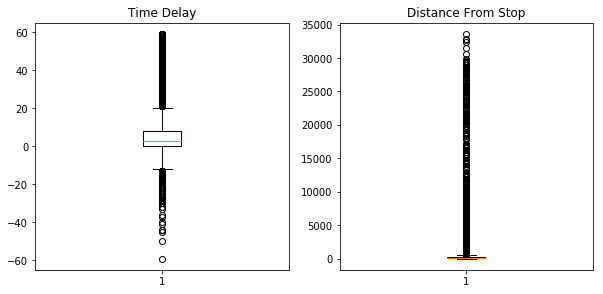

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.boxplot(mta.Time_delay)
plt.title('Time Delay')
plt.subplot(222)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 
plt.show()

Nothing will be done to correct the outliers in the Time Delay variable. We used this to create out target variable and it will not be used in any models. As far a the distance from stop variable we can look at winzorizing to minimize the outliers.

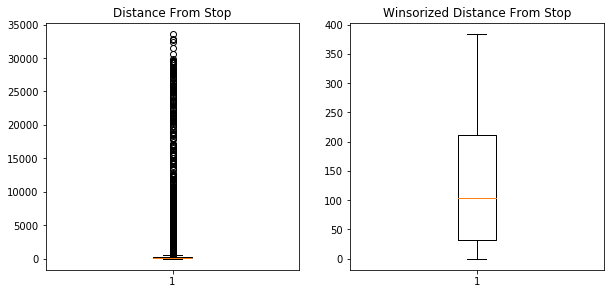

In [34]:
winsor_dist = winsorize(mta["DistanceFromStop"], (0, .1)) # one way wizorization of distance from stop 
#                                                           variable with limit set at the 90th percentile

plt.figure(figsize=(10,10))
plt.title('Distance From Stop') 
plt.subplot(221)
plt.title('Distance From Stop')
plt.boxplot(mta.DistanceFromStop) 


plt.subplot(222)
plt.title('Winsorized Distance From Stop')
plt.boxplot(winsor_dist)
plt.show()

In [35]:
mta['winsor_dist'] = winsor_dist # create a feature for winsorization of the distance from stops

 On June 27, 2017 

Let's see if there is any difference between the number of late busses of inbound vs outbound busses.

In [36]:
mta['start_end'] = mta.OriginName.astype(str)+''+mta.DestinationName.astype(str)
 

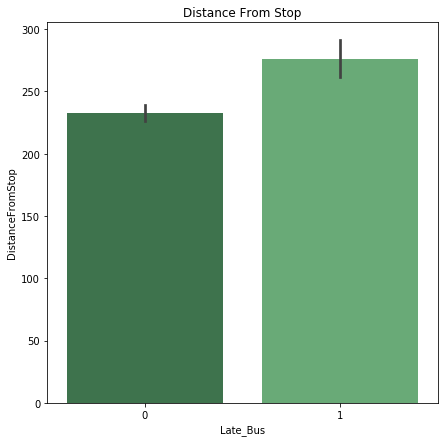

In [37]:
plt.figure(figsize=(7,7)) 
sns.barplot(mta.Late_Bus,mta.DistanceFromStop,palette="Greens_d")

plt.title('Distance From Stop')
plt.show()

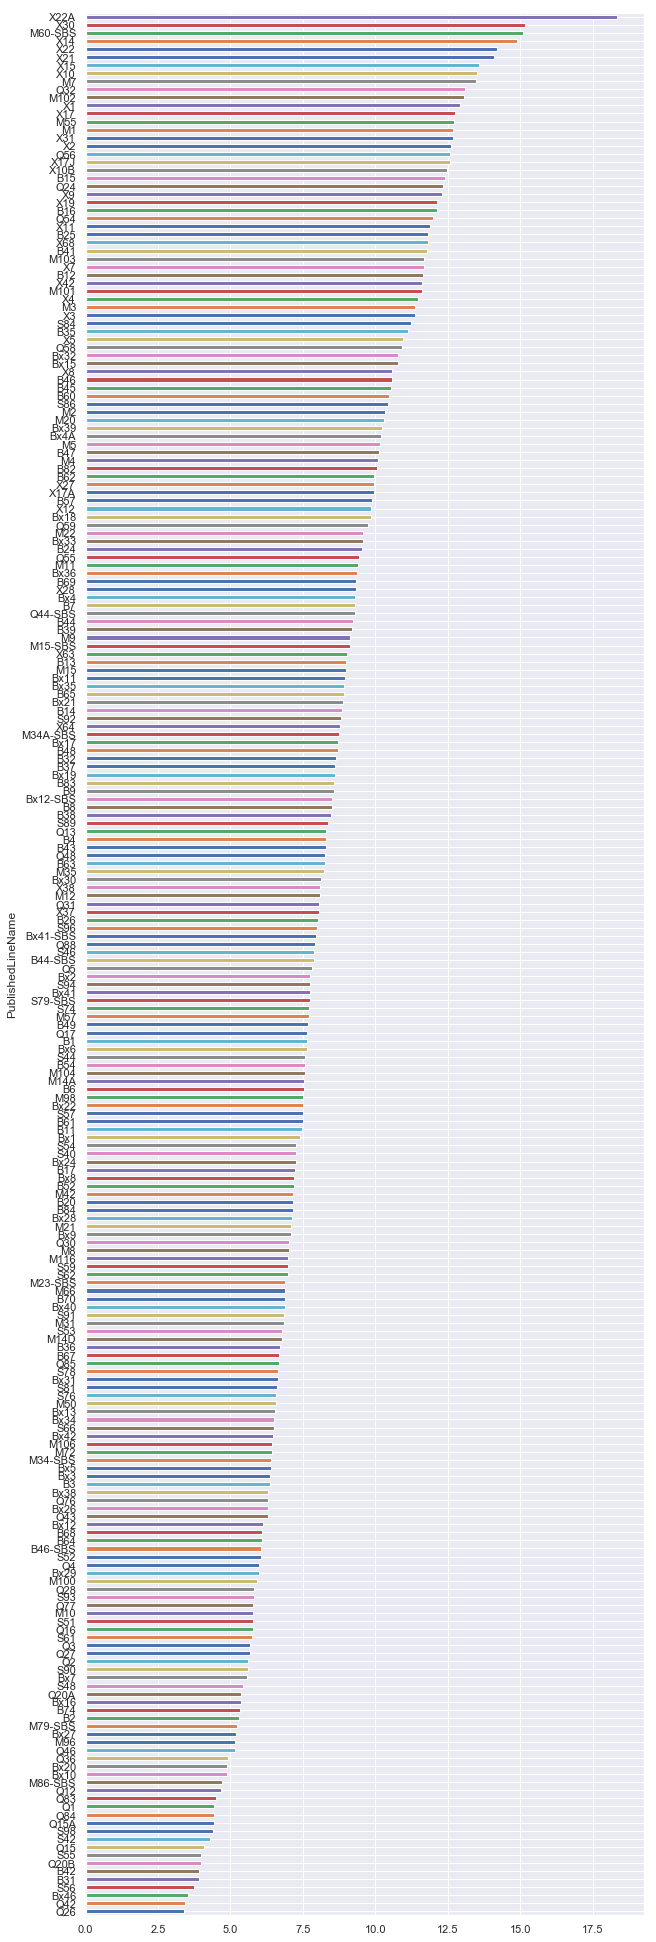

In [174]:
plt.figure(figsize=(10,35))
mta[mta.Time_delay>0].groupby('PublishedLineName').Time_delay.mean().sort_values(ascending=True).plot(kind='barh')

In [67]:
mta.sample(frac=.1)[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,Dest_geo,Orig_geo,boroughs
1620475,2017-06-09 06:47:30,0,B69,MC DONALD AV/CORTELYOU RD,40.638161,-73.978935,DNTWN BKLYN SANDS ST via VANDERBILT,40.699913,-73.987648,NYCT_354,40.685867,-73.968384,VANDERBILT AV/GREENE AV,approaching,49.0,2017-06-09 06:47:42,2017-06-09 06:44:05,3.0,0,morning,40.699913 -73.987648,40.638161 -73.97893499999999,Kings County
2987043,2017-06-16 05:48:59,0,B46,FLATBUSH AV/KINGS PLAZA,40.609566,-73.921814,BRIDGE PLZ via UTICA,40.709404,-73.959564,NYCT_4607,40.654193,-73.930644,UTICA AV/LENOX RD,< 1 stop away,166.0,2017-06-16 05:49:38,2017-06-16 05:49:59,0.0,0,morning,40.709404 -73.959564,40.609566 -73.921814,Kings County
3823750,2017-06-20 20:16:13,0,Q4,TEARDROP/LAYOVER,40.701748,-73.802399,CAMBRIA HTS 235 ST via LINDEN,40.690647,-73.727409,NYCT_5161,40.695624,-73.747978,LINDEN BL/FRANCIS LEWIS BL,< 1 stop away,169.0,2017-06-20 20:17:07,2017-06-20 20:17:00,0.0,0,night,40.690647 -73.727409,40.701747999999995 -73.802399,Queens County
656770,2017-06-04 14:28:53,1,Bx22,VALENTINE AV/E FORDHAM RD,40.862431,-73.895859,CASTLE HILL ZEREGA AV,40.814484,-73.847092,NYCT_4780,40.856721,-73.869784,BOSTON RD/PELHAM PKY,approaching,52.0,2017-06-04 14:29:22,2017-06-04 14:23:00,6.0,0,afternoon,40.814484 -73.847092,40.862431 -73.895859,Bronx County
2557740,2017-06-14 07:15:58,0,S94,YUKON AV/KMART DWY,40.575645,-74.167152,LTD ST GEORGE FERRY,40.643742,-74.073212,NYCT_8268,40.643683,-74.073178,ST GEORGE FERRY/ST GEORGE FERRY,at stop,0.0,2017-06-14 07:16:03,2017-06-14 07:06:00,10.0,1,morning,40.643741999999996 -74.073212,40.575645 -74.167152,Richmond County
1567796,2017-06-08 19:36:56,1,M14A,GRAND ST/FDR DR,40.713264,-73.977982,ABINGDON SQ CROSSTOWN,40.737671,-74.005768,NYCT_5640,40.713122,-73.977653,CHERRY ST/JACKSON ST,< 1 stop away,297.0,2017-06-08 19:37:49,2017-06-08 19:31:51,5.0,0,evening,40.737671 -74.005768,40.713264 -73.977982,New York County
616380,2017-06-04 08:29:03,1,M10,FRED DOUGLASS BL/W 158 ST,40.830956,-73.935989,COLUMBUS CIRCLE via CENTRAL PARK W.,40.766529,-73.981964,NYCT_6419,40.830790,-73.936066,FRED DOUGLASS BL/W 155 ST,< 1 stop away,222.0,2017-06-04 08:29:27,2017-06-04 08:36:16,-6.0,0,morning,40.766529 -73.981964,40.830956 -73.935989,New York County
1575404,2017-06-08 20:26:37,1,X10,E 57 ST/3 AV,40.760429,-73.967674,PT RICHMOND via NARROWS RD via GANNON AV,40.633698,-74.129776,NYCT_2646,40.705965,-74.015039,gowanus py/6 av,5.7 miles away,9141.0,2017-06-08 20:42:21,2017-06-08 20:09:44,32.0,1,night,40.633697999999995 -74.129776,40.760428999999995 -73.967674,Richmond County
5652930,2017-06-30 09:32:54,1,Q30,NASSAU BL/LITTLE NECK PY,40.764198,-73.726044,JAMAICA LIRR STA SUTPHIN BL,40.700500,-73.807838,NYCT_8457,40.755914,-73.739273,DOUGLASTON PY/61 AV,at stop,5.0,2017-06-30 09:32:56,2017-06-30 09:32:23,0.0,0,morning,40.7005 -73.807838,40.764198 -73.72604399999999,Queens County
4948577,2017-06-26 19:55:31,0,Bx3,BROADWAY/179 ST,40.849327,-73.936508,RIVERDALE BWAY - 238 ST,40.885086,-73.900436,NYCT_8386,40.885025,-73.900415,W 238 ST/BROADWAY,at stop,3.0,2017-06-26 19:55:42,2017-06-26 19:56:00,0.0,0,evening,40.885086 -73.900436,40.849327 -73.93650799999999,Bronx County


In [57]:
mtaa = mta[mta.Time_delay>=0]#.sample(frac=.001)

# Investigate Late Busses and Time Delays by hour


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


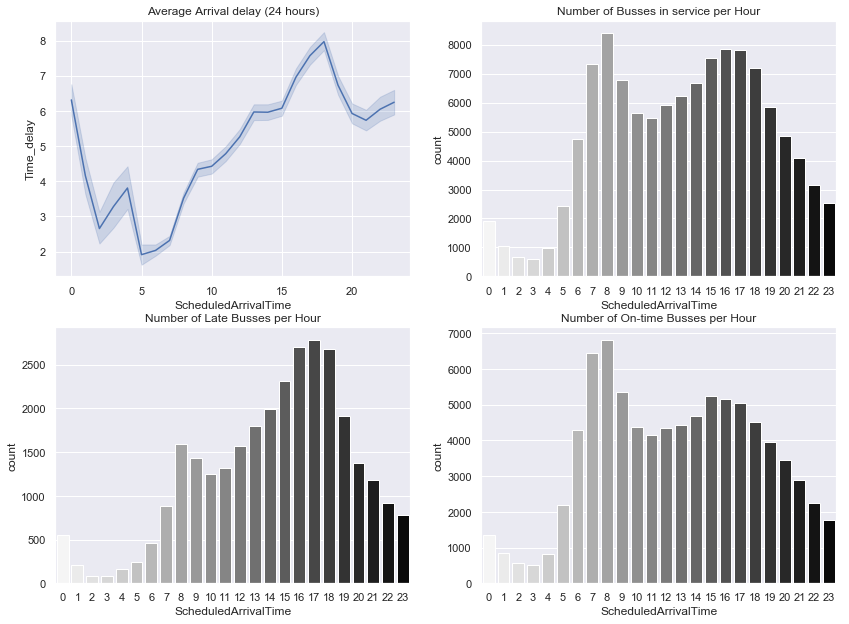

In [153]:
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.hour, 
             y=mta.Time_delay, data=mta,)

plt.title('Average Arrival delay (24 hours)')
plt.subplot(322)
sns.countplot(mta.ScheduledArrivalTime.dt.hour,palette= "gist_gray_r")

plt.title('Number of Busses in service per Hour')
plt.subplot(323)
sns.countplot(mta[mta.Late_Bus==1].ScheduledArrivalTime.dt.hour, palette= "gist_gray_r")
plt.title('Number of Late Busses per Hour')
plt.subplot(324)
sns.countplot(mta[mta.Late_Bus==0].ScheduledArrivalTime.dt.hour, palette= "gist_gray_r")
 
plt.title('Number of On-time Busses per Hour')
plt.show()

In [150]:
Late_bus_mean = mta[mta.Time_delay>=0].groupby(mta.ScheduledArrivalTime.dt.weekday).Time_delay.describe()
Late_bus_mean.index = weekday_order.values()
Late_bus_mean

,count,mean,std,min,25%,50%,75%,max
Monday,13775.0,5.724356,7.848298,0.0,1.0,3.0,8.0,59.0
Tuesday,13788.0,6.437337,8.140248,0.0,1.0,4.0,9.0,59.0
Wednesday,14276.0,7.230527,9.101076,0.0,1.0,4.0,10.0,59.0
Thursday,18178.0,7.113984,9.211954,0.0,1.0,4.0,10.0,59.0
Friday,18312.0,7.387342,9.414315,0.0,1.0,4.0,10.0,59.0
Saturday,10808.0,7.692172,9.522071,0.0,1.0,4.0,10.0,59.0
Sunday,7901.0,7.431085,9.549708,0.0,1.0,4.0,10.0,59.0


In [277]:
# t-test between the means of the percentage of late busses of the hours in the day
for i in range(len(mta.ScheduledArrivalTime.dt.hour.unique())):
        for j in range(i+1,24):
            print(mta.ScheduledArrivalTime.dt.hour.unique()[i],' vs ',mta.ScheduledArrivalTime.dt.hour
                  .unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.ScheduledArrivalTime.dt.hour==mta.ScheduledArrivalTime.dt.hour.unique()[i]]['Late_Bus'], 
                mta[mta.ScheduledArrivalTime.dt.hour==mta.ScheduledArrivalTime.dt.hour.unique()[j]]['Late_Bus']))

,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation_Lat,VehicleLocation_Long,DistanceFromStop,Time_delay,Late_Bus
ScheduledArrivalTime,,,,,,,,,
Monday,699373.426370,-1.269488e+06,699365.205377,-1.269497e+06,699360.983579,-1.269481e+06,4325608.0,68057.0,3499
Tuesday,675008.297346,-1.225300e+06,674995.343206,-1.225310e+06,674996.769539,-1.225293e+06,4232244.0,80350.0,4040
Wednesday,685591.426621,-1.244401e+06,685560.071235,-1.244413e+06,685562.492284,-1.244402e+06,4337761.0,94898.0,4626
Thursday,891533.554086,-1.618311e+06,891523.483123,-1.618312e+06,891518.394971,-1.618302e+06,5839197.0,117235.0,5756
Friday,887288.268979,-1.610615e+06,887285.160508,-1.610622e+06,887269.765377,-1.610607e+06,5639822.0,124018.0,6034
Saturday,508646.810828,-9.232069e+05,508627.923177,-9.232133e+05,508628.207451,-9.232054e+05,2209481.0,77862.0,3716
Sunday,369296.996854,-6.703637e+05,369300.007317,-6.703703e+05,369293.394455,-6.703628e+05,1686243.0,54993.0,2625


# Investigate Late Busses and Time Delays by day

In [61]:
#mta.ScheduledArrivalTime.dt.day_name().unique()
p = mta.groupby(mta.ScheduledArrivalTime.dt.weekday).Late_Bus.mean()
p.index = p.index.map(order)
p

ScheduledArrivalTime
Monday       0.203774
Tuesday      0.243770
Wednesday    0.274834
Thursday     0.262963
Friday       0.276980
Saturday     0.297566
Sunday       0.289479
Name: Late_Bus, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


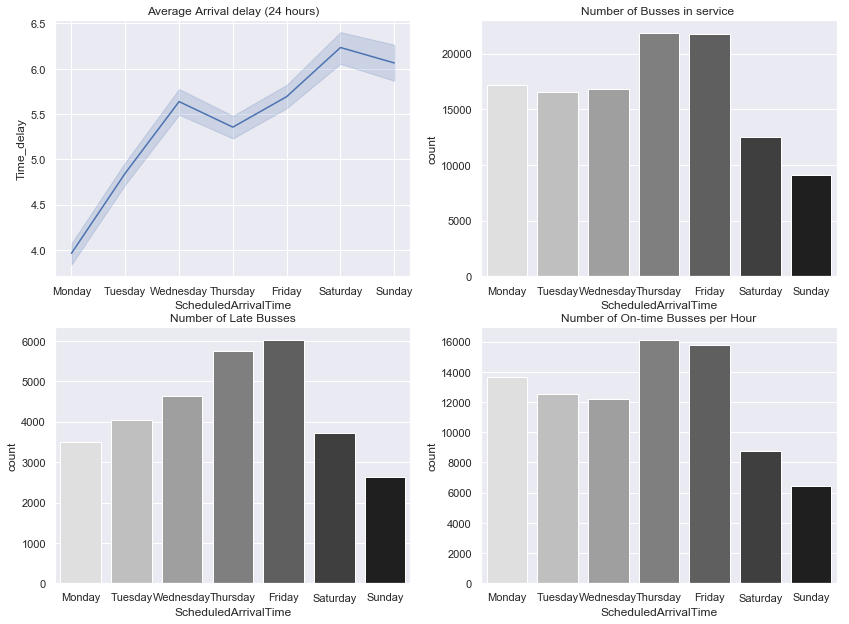

In [155]:
weekday_order={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
plt.figure(figsize=(14,16))
plt.subplot(321)
sns.lineplot(x= mta.ScheduledArrivalTime.dt.weekday, 
             y=mta.Time_delay, data=mta,)
plt.xticks(np.arange(7),weekday_order.values())
plt.title('Average Arrival delay (24 hours)')

plt.subplot(322)
sns.countplot(mta.ScheduledArrivalTime.dt.weekday,palette= "gist_gray_r")
plt.xticks(np.arange(7),weekday_order.values())
plt.title('Number of Busses in service ')

plt.subplot(323)
sns.countplot(mta[mta.Late_Bus==1].ScheduledArrivalTime.dt.weekday, palette= "gist_gray_r")
plt.title('Number of Late Busses')
plt.xticks(np.arange(7),weekday_order.values())
plt.subplot(324)
sns.countplot(mta[mta.Late_Bus==0].ScheduledArrivalTime.dt.weekday, palette= "gist_gray_r")
plt.xticks(np.arange(7),weekday_order.values()) 
plt.title('Number of On-time Busses per Hour')
plt.show()

In [85]:
#t between the means of the percentage of late busses of the days of the week
for i in range(len(mta.ScheduledArrivalTime.dt.weekday.unique())):
        for j in range(i+1,7):
            print(mta.ScheduledArrivalTime.dt.day_name().unique()[i],' vs ',mta.ScheduledArrivalTime.dt.day_name().unique()[j]) 
            print(stats.ttest_ind(
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[i]]['Late_Bus'], 
                mta[mta.ScheduledArrivalTime.dt.day_name()==mta.ScheduledArrivalTime.dt.day_name().unique()[j]]['Late_Bus']))

Friday  vs  Sunday
Ttest_indResult(statistic=-2.226175744580334, pvalue=0.02600960613070616)
Friday  vs  Saturday
Ttest_indResult(statistic=-4.06610047862341, pvalue=4.791304115924479e-05)
Friday  vs  Wednesday
Ttest_indResult(statistic=0.4677525073857689, pvalue=0.6399642268717592)
Friday  vs  Tuesday
Ttest_indResult(statistic=7.326418833381646, pvalue=2.4102815750278016e-13)
Friday  vs  Thursday
Ttest_indResult(statistic=3.299452304223091, pvalue=0.0009695119182651934)
Friday  vs  Monday
Ttest_indResult(statistic=16.745463528584857, pvalue=1.0134427696690585e-62)
Sunday  vs  Saturday
Ttest_indResult(statistic=-1.2862076029370821, pvalue=0.19838443427490715)
Sunday  vs  Wednesday
Ttest_indResult(statistic=2.504360318703774, pvalue=0.012273399881569343)
Sunday  vs  Tuesday
Ttest_indResult(statistic=7.988232688210146, pvalue=1.4259781427594385e-15)
Sunday  vs  Thursday
Ttest_indResult(statistic=4.780097695969812, pvalue=1.7601388612604414e-06)
Sunday  vs  Monday
Ttest_indResult(statisti

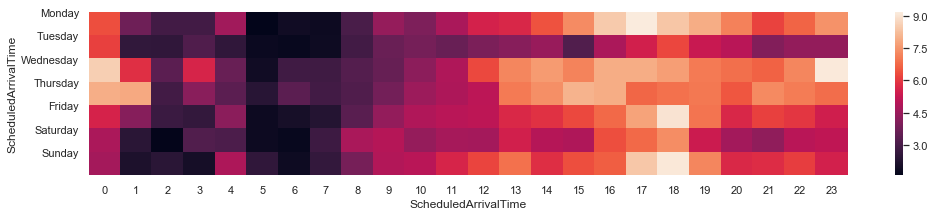

In [111]:
plt.figure(figsize=(17,3))
heat_weekdayhour = mta.pivot_table(index=mta.ScheduledArrivalTime.dt.day_name(), columns=mta.ScheduledArrivalTime.dt.hour, values="Time_delay")
sns.heatmap(heat_weekdayhour,)
plt.yticks(np.arange(7),weekday_order.values())
plt.show()

# Investigate direction reference

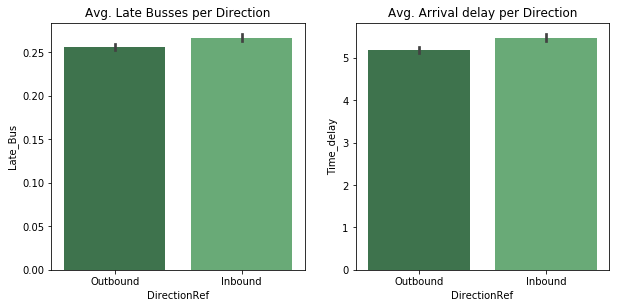

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(y=mta.Late_Bus,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Late Busses per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])

plt.subplot(222)
sns.barplot(y=mta.Time_delay,x=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Arrival delay per Direction')
plt.xticks(range(0,2), ['Outbound','Inbound'])
plt.show()

In [33]:
# Test of the mean distance between stops of late and on-time busses
inbound_df = mta[mta.DirectionRef==1]
outbound_df = mta[mta.DirectionRef==0] 
print(stats.ttest_ind(inbound_df.Late_Bus, outbound_df.Late_Bus),'\n')

# calculate correlation distance from stop and late busses
print('Correlation of distance from stops and late busses \n',mta.Late_Bus.corr(mta.DirectionRef)) 

Ttest_indResult(statistic=4.099306567795974, pvalue=4.146719932298842e-05) 

Correlation of distance from stops and late busses 
 0.012045285829768127


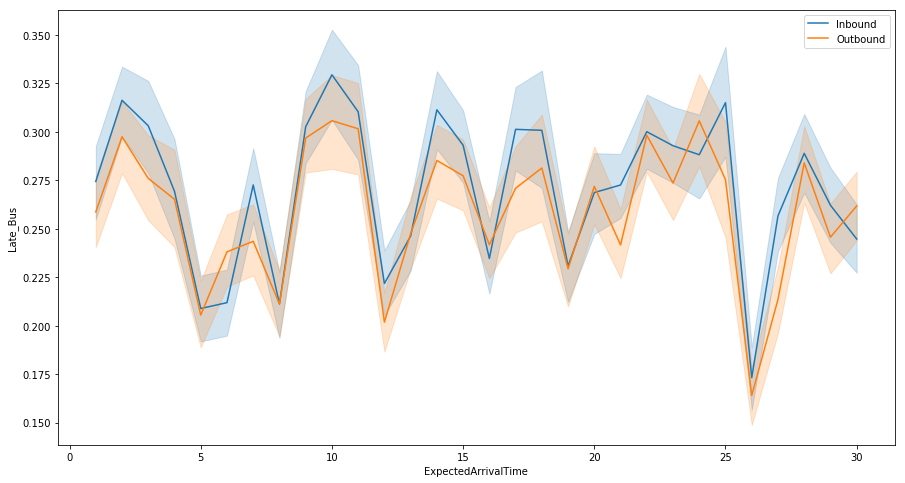

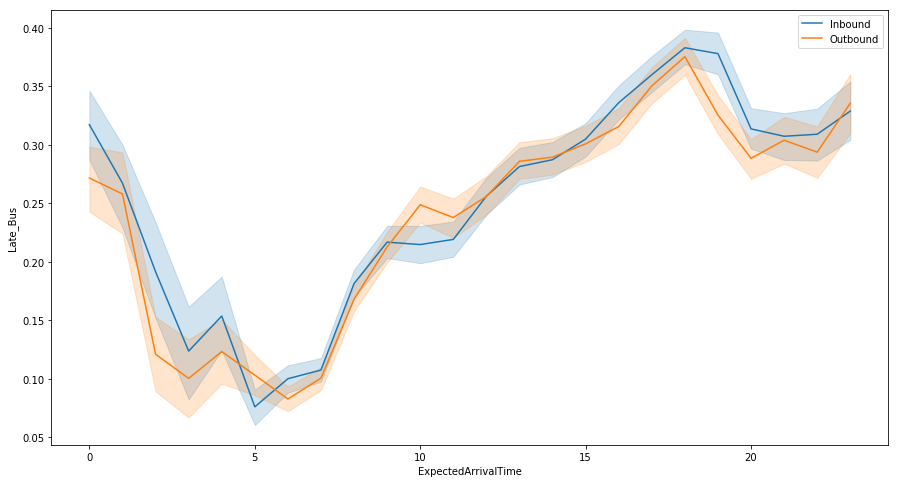

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(inbound_df.ExpectedArrivalTime.dt.day.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ExpectedArrivalTime.dt.day.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.xticks=(np.arange(0,30,.5))
plt.show() 
plt.figure(figsize=(15,8))
sns.lineplot(inbound_df.ExpectedArrivalTime.dt.hour.sort_values(), inbound_df.Late_Bus, label='Inbound') 
sns.lineplot(outbound_df.ExpectedArrivalTime.dt.hour.sort_values(), outbound_df.Late_Bus, label='Outbound')
plt.xticks=(np.arange(0,30,.5))
plt.show() 

# Investigate geological features

In [35]:
def boroughs():
    mta['boroughs'] = '0'
    mta.loc[list(np.where((mta.PublishedLineName.str.contains('x')==False) & (mta.PublishedLineName.str.startswith('B')==True))[0]),'boroughs'] = 'Brooklyn'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Bx')==True)[0]),'boroughs'] = 'Bronx'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('Q')==True)[0]),'boroughs'] = 'Queens'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('S')==True)[0]),'boroughs'] = 'Staten Island'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('M')==True)[0]),'boroughs'] = 'Manhattan'
    mta.loc[list(np.where(mta.PublishedLineName.str.startswith('X')==True)[0]),'boroughs'] = 'X'
     
        
boroughs()


In [36]:
mta.groupby('boroughs').Late_Bus.mean()

boroughs
Bronx            0.238651
Brooklyn         0.273380
Manhattan        0.296826
Queens           0.235662
Staten Island    0.206193
X                0.313562
Name: Late_Bus, dtype: float64

In [130]:
for i in range(len(mta.boroughs.unique())):
        for j in range(i+1,6):
            print(mta.boroughs.unique()[i],' vs ',mta.boroughs.unique()[j]) 
            print(stats.ttest_ind(mta[mta.boroughs==mta.boroughs.unique()[i]]['Late_Bus'], 
                                  mta[mta.boroughs==mta.boroughs.unique()[j]]['Late_Bus']))

Brooklyn  vs  Bronx
Ttest_indResult(statistic=9.462569400868786, pvalue=3.110791148893391e-21)
Brooklyn  vs  Queens
Ttest_indResult(statistic=9.861097349127617, pvalue=6.407724308207626e-23)
Brooklyn  vs  Manhattan
Ttest_indResult(statistic=-6.139888063542944, pvalue=8.311328270289301e-10)
Brooklyn  vs  X
Ttest_indResult(statistic=-6.1376398757817325, pvalue=8.453415841428729e-10)
Brooklyn  vs  Staten Island
Ttest_indResult(statistic=11.963311139373717, pvalue=6.250712587752746e-33)
Bronx  vs  Queens
Ttest_indResult(statistic=0.7431981308379194, pvalue=0.45736561766339623)
Bronx  vs  Manhattan
Ttest_indResult(statistic=-14.290844839591259, pvalue=3.1192157257666193e-46)
Bronx  vs  X
Ttest_indResult(statistic=-11.485499017051126, pvalue=1.8122232581030957e-30)
Bronx  vs  Staten Island
Ttest_indResult(statistic=5.79368430419539, pvalue=6.951549006000713e-09)
Queens  vs  Manhattan
Ttest_indResult(statistic=-14.509755640171212, pvalue=1.3539082864499697e-47)
Queens  vs  X
Ttest_indResult(s

In [67]:
mta.boroughs.value_counts()

Brooklyn         34966
Bronx            24010
Manhattan        23064
Queens           20958
Staten Island     7396
X                 5412
Name: boroughs, dtype: int64

In [51]:
mta['rush_hour'] = 0

In [55]:
mta.rush_hour.value_counts()

0    70379
1    45427
Name: rush_hour, dtype: int64

In [53]:
index = mta[(mta.ScheduledArrivalTime.dt.hour>=7) & (mta.ScheduledArrivalTime.dt.hour<=9)].index  
indexs = mta[(mta.ScheduledArrivalTime.dt.hour>=16) & (mta.ScheduledArrivalTime.dt.hour<=18)].index

In [54]:
mta.loc[index,'rush_hour'] = 1
mta.loc[indexs,'rush_hour'] = 1

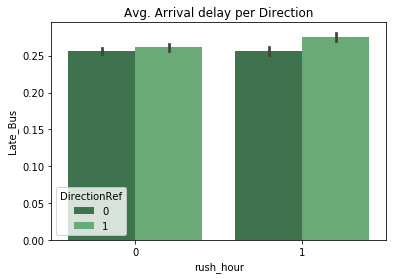

In [147]:
sns.barplot(y=mta.Late_Bus,x=mta.rush_hour,hue=mta.DirectionRef,palette="Greens_d",orient='vertical',) 
plt.title('Avg. Arrival delay per Direction')
 
plt.show()

In [ ]:
sns.barplot(y=mta.Late_Bus,x=mta.rush_hour,hue=mta.DirectionRef,palette="Greens_d") 
plt.title('Avg. Arrival delay per Direction')
 
plt.show()

In [148]:
mta.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,boroughs,rush_hour,stops,weekday
0,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,1427.0,2017-06-23 16:26:00,2017-06-23 16:26:16,0.0,0,afternoon,Brooklyn,1,KNAPP ST/SHORE PKY SBS WLMSBRG BRDG PLZ via NS...,16
1,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,154.0,2017-06-11 15:11:24,2017-06-11 14:59:05,12.0,1,afternoon,Bronx,0,WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST v...,14
2,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,104.0,2017-06-10 22:20:58,2017-06-10 22:21:22,0.0,0,night,Brooklyn,0,87 ST/4 Av MANHATTAN BEACH KINGSBORO CC,22
3,2017-06-14 10:06:11,1,B62,JACKSON AV/QUEENS PZ S,40.748638,-73.938446,DOWNTOWN BKLYN FULTON MALL,40.690407,-73.989471,NYCT_4519,40.712838,-73.960482,DRIGGS AV/S 2 ST,49.0,2017-06-14 10:06:27,2017-06-14 09:59:15,7.0,0,morning,Brooklyn,1,JACKSON AV/QUEENS PZ S DOWNTOWN BKLYN FULTON MALL,9
4,2017-06-28 17:09:54,1,Q76,132 ST/20 AV,40.782063,-73.836716,JAMAICA 165 ST TERM via F LEWIS,40.707615,-73.795540,NYCT_4195,40.715189,-73.773367,HILLSIDE AV/188 ST,8.0,2017-06-28 17:10:08,2017-06-28 17:03:28,6.0,0,evening,Queens,1,132 ST/20 AV JAMAICA 165 ST TERM via F LEWIS,17


In [248]:
a

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,boroughs,rush_hour,stops,weekday
27530,2017-06-02 15:05:55,0,S74,NEW DORP LA / MILL RD,40.569096,-74.106895,ST GEORGE FERRY,40.643772,-74.073158,NYCT_7031,40.615011,-74.084669,TARGEE ST/ROFF ST,208.0,2017-06-02 15:07:18,2017-06-02 14:54:42,12.0,1,afternoon,Staten Island,0,NEW DORP LA / MILL RD ST GEORGE FERRY,14
93583,2017-06-23 14:39:49,0,S78,MIDLAND AV/BOUNDARY AV,40.577305,-74.100975,ST GEORGE FERRY via HYLAN,40.643585,-74.072609,NYCT_8167,40.621047,-74.077746,TOMPKINS AV/HILL ST,150.0,2017-06-23 14:40:41,2017-06-23 14:29:53,10.0,1,afternoon,Staten Island,0,MIDLAND AV/BOUNDARY AV ST GEORGE FERRY via HYLAN,14
103577,2017-06-06 14:53:11,0,S78,MIDLAND AV/BOUNDARY AV,40.577305,-74.100975,ST GEORGE FERRY via HYLAN,40.643585,-74.072609,NYCT_7059,40.642781,-74.072538,ST GEORGE FERRY/ST GEORGE FERRY,96.0,2017-06-06 14:53:39,2017-06-06 14:44:00,9.0,1,afternoon,Staten Island,0,MIDLAND AV/BOUNDARY AV ST GEORGE FERRY via HYLAN,14
84999,2017-06-23 06:19:40,1,Q3,FARMERS BL/MERRICK BL,40.679409,-73.761795,JFK AIRPORT via FARMERS BL,40.647137,-73.779427,NYCT_8429,40.646465,-73.778900,JFK/TERMINAL 5-6,99.0,2017-06-23 06:20:06,2017-06-23 06:12:00,8.0,1,morning,Queens,0,FARMERS BL/MERRICK BL JFK AIRPORT via FARMERS BL,6
115184,2017-06-22 16:09:20,1,Q5,MERRICK BL/108 AV,40.698360,-73.786613,JAMAICA PRSNS-ARCHR via MERRICK,40.701683,-73.802475,NYCT_8063,40.701570,-73.803619,TEARDROP/LAYOVER,215.0,2017-06-22 16:12:11,2017-06-22 15:58:00,14.0,1,afternoon,Queens,0,MERRICK BL/108 AV JAMAICA PRSNS-ARCHR via MERRICK,15
113898,2017-06-14 15:56:38,0,Bx41,BATHGATE AV/E 172 ST,40.838570,-73.901772,WILLIAMSBRIDGE GUN HILL RD via WEBSTER,40.877934,-73.866585,NYCT_8328,40.846764,-73.901468,WEBSTER AV/E TREMONT AV,158.0,2017-06-14 15:57:33,2017-06-14 15:22:33,35.0,1,afternoon,Bronx,0,BATHGATE AV/E 172 ST WILLIAMSBRIDGE GUN HILL R...,15
66842,2017-06-13 08:24:27,1,B44,NOSTRAND AV/AV H,40.631683,-73.947639,AVENUE X,40.593864,-73.940666,NYCT_4229,40.608825,-73.943480,NOSTRAND AV/AV R,207.0,2017-06-13 08:25:13,2017-06-13 08:13:54,11.0,1,morning,Brooklyn,1,NOSTRAND AV/AV H AVENUE X,8
61242,2017-06-24 06:42:09,0,B44,NOSTRAND AV/AV U,40.600948,-73.941895,WILLAMSBURG BRIDGE PLZ via NOSTRAND,40.709316,-73.959587,NYCT_4591,40.709469,-73.960317,WASHINGTON PLZ/WASHINGTON PLZ,66.0,2017-06-24 06:42:22,2017-06-24 06:27:00,15.0,1,morning,Brooklyn,0,NOSTRAND AV/AV U WILLAMSBURG BRIDGE PLZ via NO...,6
36859,2017-06-07 00:43:45,1,B41,FLATBUSH AV/OCEAN AV,40.662643,-73.962143,KINGS PLAZA via FLATBSH,40.609211,-73.921516,NYCT_5042,40.661085,-73.961010,FLATBUSH AV/LINCOLN RD,14.0,2017-06-07 00:43:54,2017-06-07 00:21:00,22.0,1,morning,Brooklyn,0,FLATBUSH AV/OCEAN AV KINGS PLAZA via FLATBSH,0
83009,2017-06-19 16:13:40,1,B63,5 AV/5 ST,40.671356,-73.984596,BAY RIDGE SHORE RD via 5 AV,40.612312,-74.035980,NYCT_7618,40.629119,-74.022789,5 AV/78 ST,251.0,2017-06-19 16:15:07,2017-06-19 15:49:08,25.0,1,afternoon,Brooklyn,0,5 AV/5 ST BAY RIDGE SHORE RD via 5 AV,15


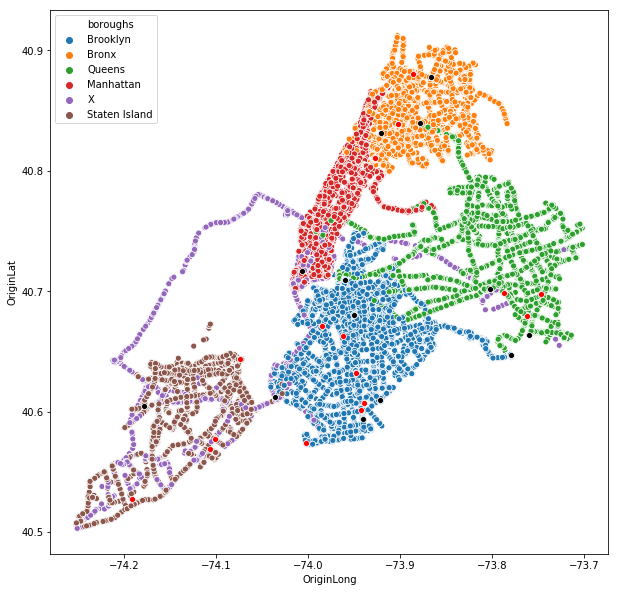

In [247]:
a = mta.loc[ind,:]
plt.figure(figsize=(10,10))
sns.scatterplot(mta.VehicleLocation_Long, mta.VehicleLocation_Lat, hue=mta.boroughs)
sns.scatterplot(a.DestinationLong, a.DestinationLat, color='black')
sns.scatterplot(a.OriginLong, a.OriginLat, color='red')

plt.show()

In [241]:
len(mta.stops.unique())

1031

In [225]:
ind = [27530, 93583, 103577, 84999, 115184, 113898, 66842, 61242, 36859, 83009, 107851, 40240, 241, 83919, 87300, 101096, 33935, 13909, 89637]

In [216]:
ind = []
for i in mta.groupby('stops').Late_Bus.mean().sort_values(ascending=False)[:16].index:
    ind.append(list(np.where(mta.stops==i)[0]))
    

In [204]:
mta.groupby('stops').Late_Bus.mean().sort_values(ascending=False)[:16].index

Index(['NEW DORP LA / MILL RD ST GEORGE FERRY',
       'MIDLAND AV/BOUNDARY AV ST GEORGE FERRY via HYLAN',
       'FARMERS BL/MERRICK BL JFK AIRPORT via FARMERS BL',
       'MERRICK BL/108 AV JAMAICA PRSNS-ARCHR via MERRICK',
       'BATHGATE AV/E 172 ST WILLIAMSBRIDGE GUN HILL RD via WEBSTER',
       'NOSTRAND AV/AV H AVENUE X',
       'NOSTRAND AV/AV U WILLAMSBURG BRIDGE PLZ via NOSTRAND',
       'FLATBUSH AV/OCEAN AV KINGS PLAZA via FLATBSH',
       '5 AV/5 ST BAY RIDGE SHORE RD via 5 AV',
       'ST GEORGE FERRY/S46 & S96 TELEPORT via CASTELTON',
       'LINCOLN AV/E 138 ST WEST FARMS', 'STUART ST/FILLMORE AV FULTON ST',
       'LUTEN AV/EYLANDT ST ST GEORGE FERRY via HYLAN',
       'FRANCIS LEWIS BL/116 AV SPRINGFIELD GARDENS 145 RD',
       'SURF AV/W 37 ST DOWNTOWN WORTH ST', 'W MOSHOLU PY S/PAUL AV 165 ST'],
      dtype='object', name='stops')

In [170]:
ind = []
for i in mta.groupby('stops').Late_Bus.mean().sort_values(ascending=False)[:16].index:
     
        ind.append(mta.stops[i].index)

Index(['NEW DORP LA / MILL RD ST GEORGE FERRY',
       'MIDLAND AV/BOUNDARY AV ST GEORGE FERRY via HYLAN',
       'FARMERS BL/MERRICK BL JFK AIRPORT via FARMERS BL',
       'MERRICK BL/108 AV JAMAICA PRSNS-ARCHR via MERRICK',
       'BATHGATE AV/E 172 ST WILLIAMSBRIDGE GUN HILL RD via WEBSTER',
       'NOSTRAND AV/AV H AVENUE X',
       'NOSTRAND AV/AV U WILLAMSBURG BRIDGE PLZ via NOSTRAND',
       'FLATBUSH AV/OCEAN AV KINGS PLAZA via FLATBSH',
       '5 AV/5 ST BAY RIDGE SHORE RD via 5 AV',
       'ST GEORGE FERRY/S46 & S96 TELEPORT via CASTELTON',
       'LINCOLN AV/E 138 ST WEST FARMS', 'STUART ST/FILLMORE AV FULTON ST',
       'LUTEN AV/EYLANDT ST ST GEORGE FERRY via HYLAN',
       'FRANCIS LEWIS BL/116 AV SPRINGFIELD GARDENS 145 RD',
       'SURF AV/W 37 ST DOWNTOWN WORTH ST', 'W MOSHOLU PY S/PAUL AV 165 ST'],
      dtype='object', name='stops')

In [40]:
mta[pd.to_numeric(mta.rush_hour==1)].ExpectedArrivalTime.dt.minute.mean()

29.397781055319523

In [41]:
mta[pd.to_numeric(mta.rush_hour==1)].Late_Bus.value_counts()

0    33350
1    12077
Name: Late_Bus, dtype: int64

In [42]:
mta[mta.rush_hour==0].Time_delay.mean()


nan

In [430]:
mta_s = pd.concat([mta, pd.get_dummies(mta.day_of_week.astype('category'),drop_first=True),], axis=1)
mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.time_of_day.astype('category'),drop_first=True),], axis=1)
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.PublishedLineName.astype('category'),drop_first=True),], axis=1)
mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.boroughs.astype('category'),drop_first=True),], axis=1)
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.day_of_week.astype('category'),drop_first=True),], axis=1) 
#mta_s = pd.concat([mta_s, pd.get_dummies(mta_s.DestinationName.astype('category'),drop_first=True),], axis=1)
mta_s.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,hour,day_of_month,day_of_week,rush_hour,Dest_geo,Orig_geo,boroughs,sin_hour,cos_hour,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,evening,morning,night,Hudson County,Kings County,Nassau County,New York County,Queens County,Richmond County,Westchester County
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,2017-06-01 00:06:14,-2.0,0,morning,0,1,1,0,40.656048 -73.907379,40.616104 -74.031143,Kings County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,2017-06-01 00:00:53,3.0,0,night,0,1,1,0,40.912376 -73.902534,40.875008 -73.880142,Westchester County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,2017-06-01 00:03:00,1.0,0,night,0,1,1,0,40.666012 -73.735939,40.701747999999995 -73.802399,Queens County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,2017-06-01 00:02:35,1.0,0,night,0,1,1,0,40.82111 -73.935898,40.731342 -73.990288,New York County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,2017-06-01 00:00:01,3.0,0,night,0,1,1,0,40.642990000000005 -73.878326,40.57708 -73.98129300000001,Kings County,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [138]:
mta['weekday'] = mta.ScheduledArrivalTime.dt.hour

In [140]:
mta_sample = pd.concat([mta[['Late_Bus',]],pd.get_dummies(mta.weekday.astype('category'),drop_first=True),], axis=1)


In [196]:
mta_sample.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef',
       ...
       'WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON',
       'WORTH ST/BROADWAY ANNADALE RD',
       'WORTH ST/BROADWAY ARDEN HTS HUGUENOT AV',
       'WYCKOFF AV/DE KALB AV SPRING CREEK GATEWAY MALL',
       'WYCKOFF ST/PALMETTO ST DNTWN BKLYN TILLARY ST via HALSEY',
       'YUKON AV/KMART DWY LTD ST GEORGE',
       'YUKON AV/KMART DWY LTD ST GEORGE FERRY',
       'YUKON AV/KMART DWY ST GEORGE FERRY',
       'YUKON AV/WATCHMANS OFFICE LTD ST GEORGE',
       'YUKON AV/WATCHMANS OFFICE ST GEORGE FERRY'],
      dtype='object', length=1051)

In [198]:
features

,1 AV/E 1 ST SELECT BUS SERVICE 125ST via 1 AV,1 AV/E 27 ST BATTERY PK CITY via AV C via PARK ROW,116 AV/FRANCIS LEWIS BL JAMAICA PRSNS - ARCHR via LINDEN,12 AV/42 ST UN - 1 AV CROSSTOWN,12 AV/W 23 ST SELECT BUS EAST SIDE AVENUE C CROSSTOWN,12 AV/W 42 ST ISLAND E 49 ST & 1 AV,132 ST/20 AV JAMAICA 165 ST TERM via F LEWIS,137 AV/ FARMERS BL JAMAICA PRSNS - ARCHR,138 ST/37 AV CAMBRIA HTS 120 AV,138 ST/37 AV FRESH MEADOWS H HARDING EXY - 188 ST,138 ST/37 AV JAMAICA ARCHER AV,138 ST/37 AV JAMAICA AV,138 ST/37 AV LTD CAMBRIA HEIGHTS 120 AV,138 ST/37 AV LTD JAMAICA ARCHER AV,138 ST/37 AV QNSBORO CC,138 ST/37 AV SPRINGFIELD BL H HARDING EXY,149 AV/253 ST MIDTOWN 23 ST - 1 AV,15 AV/COLLEGE PT BL JAMAICA MERRICK BL via 14 AV via MAIN ST,150 ST/CROSS ISLAND PY SVC RD FLUSHING MAIN ST STA via 154 ST,153 ST/HILLSIDE AV 227 ST 114 AV via LIBERTY,153 ST/HILLSIDE AV LTD 227 ST via LIBERTY,153 ST/HILLSIDE AV QNS VILL JAM AV via LIBERTY via MURDOCK,153 ST/HILLSIDE AV SPRINGFIELD BL,161 ST/3 AV WASHINGTON HTS GW BRIDGE,165 ST / BUS TERMINAL SPRINGFIELD GARDENS 145 RD,...,WEST SHORE PLAZA/CHELSEA ST LTD ST GEORGE via CASTLETON,WEST SHORE PLAZA/CHELSEA ST ST GEORGE FERRY via CASTLTN,"WEST ST/CHRISTOPHER ST AVENUE ""D"" CROSSTOWN",WESTCHESTER AV/E TREMONT AV WILLIAMSBRIGDE 225 ST,WESTCHESTER AV/LANE AV MOTT HAVEN 136 ST,WHITE PLAINS RD/E 225 ST LOCUST PT TIERNEY PL,WHITE PLAINS RD/E 225 ST WESTCHESTER SQ,WHITE PLAINS RD/E GUN HILL RD FORDHAM RD,WHITE PLAINS RD/E GUN HILL RD SELECT BUS SERVICE THE HUB 3AV-149ST,WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER,WHITE PLAINS RD/E GUN HILL RD WAKEFIELD 241 ST via WHITE PLS RD,WILLIAMS AV/FLATLANDS AV WILLIAMSBURG BRIDGE PLAZA,WILSON AV/GREENE AV CANARSIE WILLIAMS AV,WOODROW RD/VINELAND AV DOWNTOWN WORTH ST via CHURCH ST,WOODROW RD/VINELAND AV E MIDTOWN 57 ST via CHURCH via MADISON,WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON,WORTH ST/BROADWAY ANNADALE RD,WORTH ST/BROADWAY ARDEN HTS HUGUENOT AV,WYCKOFF AV/DE KALB AV SPRING CREEK GATEWAY MALL,WYCKOFF ST/PALMETTO ST DNTWN BKLYN TILLARY ST via HALSEY,YUKON AV/KMART DWY LTD ST GEORGE,YUKON AV/KMART DWY LTD ST GEORGE FERRY,YUKON AV/KMART DWY ST GEORGE FERRY,YUKON AV/WATCHMANS OFFICE LTD ST GEORGE,YUKON AV/WATCHMANS OFFICE ST GEORGE FERRY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
Y = mta['Late_Bus'] 
X = mta.winsor_dist.values.reshape(-1,1)  
 
 
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

In [97]:
import sys
np.set_printoptions(threshold=np.inf)
mta_sample.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef',
       ...
       'WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON',
       'WORTH ST/BROADWAY ANNADALE RD',
       'WORTH ST/BROADWAY ARDEN HTS HUGUENOT AV',
       'WYCKOFF AV/DE KALB AV SPRING CREEK GATEWAY MALL',
       'WYCKOFF ST/PALMETTO ST DNTWN BKLYN TILLARY ST via HALSEY',
       'YUKON AV/KMART DWY LTD ST GEORGE',
       'YUKON AV/KMART DWY LTD ST GEORGE FERRY',
       'YUKON AV/KMART DWY ST GEORGE FERRY',
       'YUKON AV/WATCHMANS OFFICE LTD ST GEORGE',
       'YUKON AV/WATCHMANS OFFICE ST GEORGE FERRY'],
      dtype='object', length=1052)

In [57]:
#mta_sample = a #mta_s[mta_s.ScheduledArrivalTime.dt.day<27].sample(frac=.001,random_state=20)
Y = mta['Late_Bus'] 
X = mta.winsor_dist.values.reshape(-1,1) 

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=20)

 # Automatic feature selection with SelectKbest
import sklearn.feature_selection 
#from sklearn.feature_selection import f_regression
select =sklearn.feature_selection.SelectKBest(k='all')
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

#X = mta_sample
#Y = mta_sample['Late_Bus']



# Standardizing data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#scaler.fit(x_train_selected) 
#X_train = scaler.transform(x_train_selected)
#X_test = scaler.transform(x_test_selected)



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [457]:
X_train = x_train_selected
X_test = x_test_selected

In [171]:
sns.heatmap(pd.DataFrame(X_train).corr())

In [259]:

from sklearn.preprocessing import normalize
X_train = normalize(X_train)



In [68]:

 # Create balanced classes for the training set
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=20)
X_train, y_train = ros.fit_sample(X_train, y_train)


In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble 
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Modeling

In [73]:
mnb = MultinomialNB() 
neighbors = KNeighborsClassifier(n_neighbors=35) 
decision_tree = tree.DecisionTreeClassifier(max_leaf_nodes=100)
rfc = ensemble.RandomForestClassifier(n_estimators=100,class_weight='balanced') 
svc = SVC(probability=True, gamma='auto') 
lr = LogisticRegression(solver='lbfgs' ) 
clf = ensemble.GradientBoostingClassifier(n_estimators=100)
models = [ decision_tree]
for model in models:
    
    print(str(model))
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print()
    print(roc_auc_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print(model.score(X_test, y_test))
    print()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.5182424044679083
0.48129554655870443
0.5354891632846904



Accuracy score : 0.538813573957344
ROC_AUC cross validataion score:  [0.51686739 0.53657867 0.53310673 0.51911367 0.51581772]

Consfusion Matrix
col_0        0     1
Late_Bus            
0         9488  7499
1         3183  2992

Classification Report
              precision    recall  f1-score   support

     On-time       0.75      0.56      0.64     16987
        Late       0.29      0.48      0.36      6175

    accuracy                           0.54     23162
   macro avg       0.52      0.52      0.50     23162
weighted avg       0.63      0.54      0.56     23162

AUC: 0.524


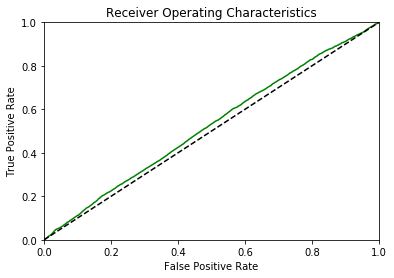

In [77]:
Metrics(clf, X_train , y_train, X_test, y_test)

### Naive Bayes

In [205]:
# Instatiate the model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(fit_prior=True) 

Accuracy score : 0.7333995337190226
ROC_AUC cross validataion score:  [0.5 0.5 0.5 0.5 0.5]

Consfusion Matrix
col_0         0
Late_Bus       
0         16987
1          6175

Classification Report
              precision    recall  f1-score   support

     On-time       0.73      1.00      0.85     16987
        Late       0.00      0.00      0.00      6175

    accuracy                           0.73     23162
   macro avg       0.37      0.50      0.42     23162
weighted avg       0.54      0.73      0.62     23162

AUC: 0.500


C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\keith\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


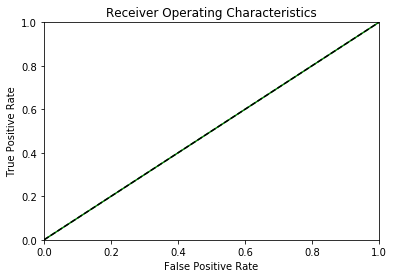

In [65]:
# Confusion matrix

def AUC_ROC_plot(model,X_train,y_train,X_test,y_test,color): 
    model.fit(X_train , y_train)
    y_prob = cross_val_predict(model, X_test, y_test, method='predict_proba',cv=5)    
    auc = roc_auc_score(y_test,y_prob[:,1])
    print('AUC: %.3f' % auc)
    fpr, tpr,thresholds = roc_curve(y_test,y_prob[:,1])
    plt.plot(fpr,tpr,color)    
    plt.plot([0.0,1.0],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics')
    plt.xlim([0.0,1.0])     
    plt.ylim([0.0,1.0])

    
def Metrics(model, X_train , y_train, X_test, y_test,):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    
    print('Accuracy score :',model.score( X_test , y_test,))
    print('ROC_AUC cross validataion score: ',cross_val_score(model, X_test , y_test, cv=5,scoring='roc_auc'))
    print()
    print("Consfusion Matrix")
    print(pd.crosstab(y_test,y_pred))
    print()

    # Classification report
    print("Classification Report")
    from sklearn.metrics import classification_report

    target_names = ['On-time','Late']
    print(classification_report(y_test,y_pred, target_names=target_names))
    AUC_ROC_plot(model,X_train,y_train,X_test,y_test,'g')
    plt.show()
Metrics(mnb, X_train , y_train, X_test, y_test)

In [288]:
# initiate GridsearchCV for best parameters
from sklearn.model_selection import GridSearchCV
def gridsearch(model, X_train , y_train, param_grid):    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', return_train_score=True)
    grid.fit(X_train , y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    
    
param_grid = dict(alpha=np.arange(1,5,1),fit_prior=(True,False))    
gridsearch(mnb, X_train , y_train, param_grid)

{'alpha': 1, 'fit_prior': True}
0.6060748565405366


Accuracy score : 0.6275100401606426
ROC_AUC cross validataion score:  [0.6195552  0.59428872 0.59257797 0.59351351 0.63290541]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
              precision    recall  f1-score   support

     On-time       0.80      0.66      0.73       743
        Late       0.35      0.53      0.42       253

   micro avg       0.63      0.63      0.63       996
   macro avg       0.58      0.59      0.57       996
weighted avg       0.69      0.63      0.65       996

AUC: 0.605


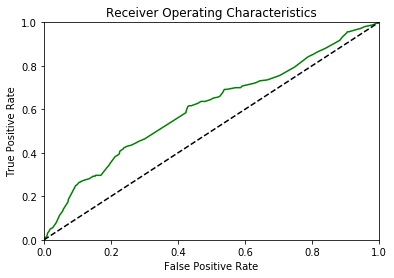

In [289]:
# refit model with new prams
mnb = MultinomialNB(alpha=1, fit_prior=True)
Metrics(mnb, X_train , y_train,X_test,y_test) 

### KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(algorithm='auto', n_neighbors=20) 
Metrics(neighbors, X_train , y_train, X_test, y_test) 
 

NameError: name 'Metrics' is not defined

In [291]:
param_grid = 
gridsearch(neighbors, X_train , y_train, param_grid)

SyntaxError: invalid syntax (<ipython-input-291-e4e2249c1885>, line 1)

Accuracy score : 0.7439759036144579
ROC_AUC cross validataion score:  [0.59442032 0.58560337 0.58231346 0.545      0.59621622]

Consfusion Matrix
col_0       0   1
Late_Bus         
0         729  14
1         241  12

Classification Report
              precision    recall  f1-score   support

     On-time       0.75      0.98      0.85       743
        Late       0.46      0.05      0.09       253

   micro avg       0.74      0.74      0.74       996
   macro avg       0.61      0.51      0.47       996
weighted avg       0.68      0.74      0.66       996

AUC: 0.578


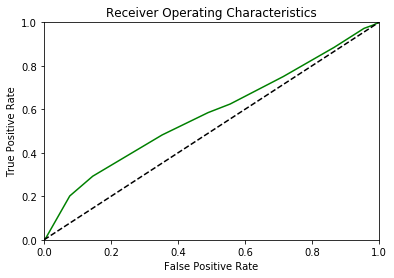

In [292]:
# refit model with new params 
neighbors = KNeighborsClassifier(n_neighbors=2,weights='distance',p=2)
neighbors = KNeighborsClassifier(algorithm='auto', n_neighbors=20) 
Metrics(neighbors, X_train , y_train, X_test, y_test) 


 

The model did poorly when n_neighbors was set at 10. Our test set is imbalanced so the neighbors for the under-reperesented class are sparce. Increasing the n_neighbors significantly improved the results. There is still obviouly room for improvment but that could come from better preprocessing.

### Desision trees

In [207]:
from sklearn import tree
# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(max_features= 'sqrt', random_state=20,)
Metrics(decision_tree, X_train , y_train, X_test, y_test) 


NameError: name 'Metrics' is not defined

In [294]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(30,80,10), max_leaf_nodes=range(300,600,100) )
gridsearch(decision_tree, X_train , y_train, param_grid)

{'max_depth': 30, 'max_leaf_nodes': 300}
0.6191912596781233


Accuracy score : 0.5160642570281124
ROC_AUC cross validataion score:  [0.58303724 0.56060008 0.5670483  0.55594595 0.61905405]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         334  409
1          73  180

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.45      0.58       743
        Late       0.31      0.71      0.43       253

   micro avg       0.52      0.52      0.52       996
   macro avg       0.56      0.58      0.50       996
weighted avg       0.69      0.52      0.54       996

AUC: 0.565


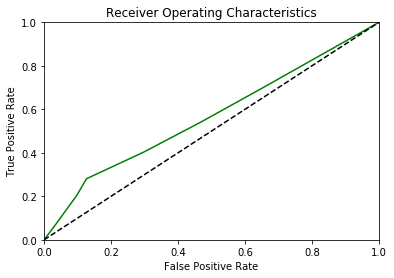

In [295]:
# refit model with new params
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=10000, max_features=None,
                                            max_leaf_nodes=2 ,random_state=20,class_weight='balanced')
Metrics(decision_tree, X_train , y_train, X_test, y_test) 


### Random forrest

In [208]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# instantiate model
rfc = ensemble.RandomForestClassifier(n_estimators=30) 
Metrics(rfc, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [297]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(1,6,1), max_leaf_nodes=range(2,10,1))
gridsearch(decision_tree, X_train , y_train, param_grid)

{'max_depth': 4, 'max_leaf_nodes': 9}
0.6122879410638925


Accuracy score : 0.5652610441767069
ROC_AUC cross validataion score:  [0.63929464 0.60034215 0.54967759 0.56986486 0.59682432]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         399  344
1          89  164

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.54      0.65       743
        Late       0.32      0.65      0.43       253

   micro avg       0.57      0.57      0.57       996
   macro avg       0.57      0.59      0.54       996
weighted avg       0.69      0.57      0.59       996

AUC: 0.585


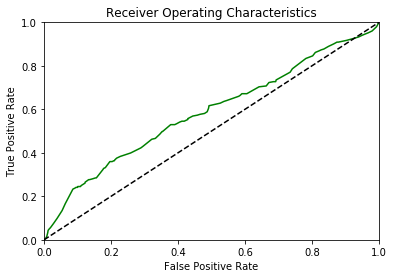

In [299]:
# refit model with new params
rfc = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=4, max_leaf_nodes=9,class_weight='balanced') 
Metrics(rfc, X_train , y_train, X_test, y_test) 

In [300]:
precision_recall_plot (rfc,X_test,y_test) 
plt.show()

NameError: name 'precision_recall_plot' is not defined

In [301]:
y_prob = rfc.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.55)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         411  332
1          94  159

Classification Report
                  precision    recall  f1-score   support

  positve review       0.81      0.55      0.66       743
negative reviews       0.32      0.63      0.43       253

       micro avg       0.57      0.57      0.57       996
       macro avg       0.57      0.59      0.54       996
    weighted avg       0.69      0.57      0.60       996


Confusion Matrix with binarized class:
col_0     0.0  1.0
Late_Bus          
0         459  284
1         121  132

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.79      0.62      0.69       743
negative reviews       0.32      0.52      0.39       253

       micro avg       0.59      0.59      0.59       996
       macro avg       0.55      0.57      0.54       996
    weighted avg       0.67      0.59      0.62       996



### Logistic regression

In [209]:
# Declare a logistic regression classifier.
lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='saga',max_iter=100, penalty='l1',C=1) 
 
Metrics(lr, X_train , y_train, X_test, y_test) 


# Display.
print()
print('Coefficients')
print(fit.coef_)
print(fit.intercept_) 

NameError: name 'Metrics' is not defined

In [337]:
# initiate GridsearchCV
param_grid = dict(max_iter=range(2,55,1),class_weight=(None,'balanced'))
gridsearch(lr, X_train , y_train, param_grid)


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packa

{'class_weight': None, 'max_iter': 3}
0.6077860727888225


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score : 0.6275100401606426
ROC_AUC cross validataion score:  [0.64798    0.61468614 0.61863403 0.58256757 0.62844595]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
              precision    recall  f1-score   support

     On-time       0.80      0.66      0.73       743
        Late       0.35      0.53      0.42       253

   micro avg       0.63      0.63      0.63       996
   macro avg       0.58      0.59      0.57       996
weighted avg       0.69      0.63      0.65       996

AUC: 0.612

Coefficients
[[-0.30633663  0.27808635  0.10812657  0.04000211  0.44207154 -0.5057509
   0.03530981]]
0.0


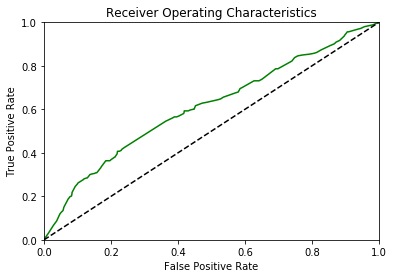

In [334]:
lr = LogisticRegression(random_state=20, fit_intercept=False ,solver='liblinear',class_weight='balanced', max_iter=15) 
 
# refit the model with new params.
fit = lr.fit(X_train, y_train)

Metrics(lr, X_train , y_train, X_test, y_test) 
print()

# Display 
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lr.predict(X_test)



In [ ]:
precision_recall_plot (lr,X_test,y_test) 
plt.show()

In [129]:
y_prob = lr.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.12)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         480  353
1         130  198

Classification Report
                  precision    recall  f1-score   support

  positve review       0.79      0.58      0.67       833
negative reviews       0.36      0.60      0.45       328

       micro avg       0.58      0.58      0.58      1161
       macro avg       0.57      0.59      0.56      1161
    weighted avg       0.67      0.58      0.60      1161


Confusion Matrix with binarized class:
col_0     1.0
Late_Bus     
0         833
1         328

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.00      0.00      0.00       833
negative reviews       0.28      1.00      0.44       328

       micro avg       0.28      0.28      0.28      1161
       macro avg       0.14      0.50      0.22      1161
    weighted avg       0.08      0.28      0.12      1161



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [210]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',probability=True) 
Metrics(svc, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [ ]:
param_grid = dict(C=np.arange(.1,5,.1))
gridsearch(lr, X_train , y_train, param_grid)


Accuracy score : 0.5160642570281124
ROC_AUC cross validataion score:  [0.6514015  0.56652191 0.61698908 0.60648649 0.63716216]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         334  409
1          73  180

Classification Report
              precision    recall  f1-score   support

     On-time       0.82      0.45      0.58       743
        Late       0.31      0.71      0.43       253

   micro avg       0.52      0.52      0.52       996
   macro avg       0.56      0.58      0.50       996
weighted avg       0.69      0.52      0.54       996

AUC: 0.588


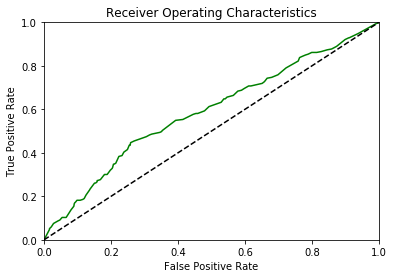

In [319]:
# refit model with new params
svc = SVC(kernel='linear',class_weight='balanced',probability=True) 
Metrics(svc, X_train , y_train, X_test, y_test) 

In [ ]:
precision_recall_plot (svc,X_test,y_test) 
plt.show()

In [134]:
y_prob = svc.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.51)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         368  465
1         87   241

Classification Report
                  precision    recall  f1-score   support

  positve review       0.81      0.44      0.57       833
negative reviews       0.34      0.73      0.47       328

       micro avg       0.52      0.52      0.52      1161
       macro avg       0.58      0.59      0.52      1161
    weighted avg       0.68      0.52      0.54      1161


Confusion Matrix with binarized class:
col_0     0.0
Late_Bus     
0         833
1         328

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.72      1.00      0.84       833
negative reviews       0.00      0.00      0.00       328

       micro avg       0.72      0.72      0.72      1161
       macro avg       0.36      0.50      0.42      1161
    weighted avg       0.51      0.72      0.60      1161



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gradient boost

In [211]:
from sklearn import ensemble 

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=2,
                                          loss='deviance', random_state=20) 
Metrics(clf, X_train , y_train, X_test, y_test) 

NameError: name 'Metrics' is not defined

In [ ]:
# initiate GridsearchCV
param_grid = dict(max_depth=range(1,6,1), max_leaf_nodes=range(2,10,1))
Metrics(svc, X_train , y_train, X_test, y_test) 

Accuracy score : 0.572289156626506
ROC_AUC cross validataion score:  [0.60442163 0.59968417 0.52954336 0.56554054 0.56628378]

Consfusion Matrix
col_0       0    1
Late_Bus          
0         411  332
1          94  159

Classification Report
              precision    recall  f1-score   support

     On-time       0.81      0.55      0.66       743
        Late       0.32      0.63      0.43       253

   micro avg       0.57      0.57      0.57       996
   macro avg       0.57      0.59      0.54       996
weighted avg       0.69      0.57      0.60       996

AUC: 0.572


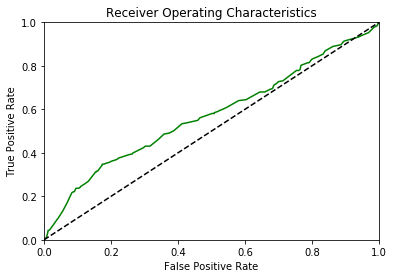

In [320]:
# refit model with new params.
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=2,
                                          loss='deviance', random_state=20) 
Metrics(clf, X_train , y_train, X_test, y_test) 

In [100]:
precision_recall_plot (clf,X_test,y_test) 
plt.show()

NameError: name 'precision_recall_plot' is not defined

In [322]:
y_prob = clf.predict_proba(X_test)
y_pred_class = binarize(y_prob,0.51)
y_pred_class = y_pred_class[:,1]
 

print('Confusion Matrix:')
print(pd.crosstab( y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test ,y_pred, target_names=target_names))
print()

print('Confusion Matrix with binarized class:')
print(pd.crosstab( y_test,y_pred_class))
print()
print('Classification report with binarized class:') 
print(classification_report(y_test ,y_pred_class, target_names=target_names))


Confusion Matrix:
col_0       0    1
Late_Bus          
0         492  251
1         120  133

Classification Report
                  precision    recall  f1-score   support

  positve review       0.80      0.66      0.73       743
negative reviews       0.35      0.53      0.42       253

       micro avg       0.63      0.63      0.63       996
       macro avg       0.58      0.59      0.57       996
    weighted avg       0.69      0.63      0.65       996


Confusion Matrix with binarized class:
col_0     0.0  1.0
Late_Bus          
0         453  290
1         117  136

Classification report with binarized class:
                  precision    recall  f1-score   support

  positve review       0.79      0.61      0.69       743
negative reviews       0.32      0.54      0.40       253

       micro avg       0.59      0.59      0.59       996
       macro avg       0.56      0.57      0.55       996
    weighted avg       0.67      0.59      0.62       996



In [371]:
from progressbar import ProgressBar
pbar = ProgressBar()

mta.col.unique()[:10]

array(['40.603164 -73.94241', '40.819221999999996 -73.916341',
       '40.57659 -73.968469', '40.712838 -73.960482',
       '40.715189 -73.77336700000001', '40.856698 -73.928342',
       '40.705248 -73.90176899999999', '40.638546000000005 -73.953724',
       '40.668192 -73.920236', '40.833028999999996 -73.82884399999999'],
      dtype=object)

In [396]:
mta['dest_county'] = mta.col.map(county)

0       Kings County
1       Bronx County
2       Kings County
3       Kings County
4      Queens County
5    New York County
6       Kings County
7       Kings County
8       Kings County
9       Bronx County
Name: county, dtype: object

In [38]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'time_of_day', 'winsor_dist', 'start_end'],
      dtype='object')

In [39]:
from datetime import datetime
startTime = datetime.now()

from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
mta['col'] = mta['DestinationLat'].astype(str)+' '+mta['DestinationLong'].astype(str)
county = {}
for i in range(len(mta['col'].unique())):     
    county.update({ mta['col'].unique()[i] : search.by_coordinates(float(mta['col'].unique()[i].split()[0]), float(mta['col'].unique()[i].split()[1]), radius=80, returns=5)[0].values()[5] })
 
 
print(datetime.now() - startTime)

0:00:48.885251


In [44]:
len(mta.col.unique())

501

In [ ]:
def LatLong_to_county(Lat,Long,type_county):
    from uszipcode import SearchEngine
    search = SearchEngine(simple_zipcode=True)
    result=[]
    mta['col'] = mta[Lat].astype(str)+' '+mta[Long].astype(str)
    for i in range(len(mta['col'].unique())):
        result.append(search.by_coordinates(float(mta['col'].unique()[i].split()[0]), float(mta['col'].unique()[i].split()[1]), radius=80, returns=5)[0].values()[5])
    county = {}
    county.update({'counties' : result, 'geo' : mta['col'].unique()})
    df.head()
   
    for i in mta['col'].unique():
        if i in list(df[df.counties=='Kings County'].geo):
            county.update({i:'Kings County'})
        if i in list(df[df.counties=='Westchester County'].geo):
            county.update({i:'Westchester County'})
        if i in list(df[df.counties=='Queens County'].geo):
            county.update({i:'Queens County'})
        if i in list(df[df.counties=='New York County'].geo):
            county.update({i:'New York County'})
        if i in list(df[df.counties=='Richmond County'].geo):
            county.update({i:'Richmond County'})
        if i in list(df[df.counties=='Bronx County'].geo):
            county.update({i:'Bronx County'})
        if i in list(df[df.counties=='Nassau County'].geo):
            county.update({i:'Nassau County'})
        if i in list(df[df.counties=='Hudson County'].geo):
            county.update({i:'Hudson County'})
        
    mta[type_county] = 0
    name_county = []
    for i in mta['col']:
        name_county.append(county.get(i))    
    mta[type_county] = name_county
    mta.drop('col',1,inplace=True)

In [ ]:
def LatLong_to_county(Lat,Long,type_county):
    from uszipcode import SearchEngine
    search = SearchEngine(simple_zipcode=True)
    result=[]
    mta['col'] = mta[Lat].astype(str)+' '+mta[Long].astype(str)
    for i in range(len(mta['col'].unique())):
        result.append(search.by_coordinates(float(mta['col'].unique()[i].split()[0]), float(mta['col'].unique()[i].split()[1]), radius=80, returns=5)[0].values()[5])
    county = {}
    df = pd.DataFrame({'counties' : result, 'geo' : mta['col'].unique()})
    df.head()
   
    for i in mta['col'].unique():
        if i in list(df[df.counties=='Kings County'].geo):
            county.update({i:'Kings County'})
        if i in list(df[df.counties=='Westchester County'].geo):
            county.update({i:'Westchester County'})
        if i in list(df[df.counties=='Queens County'].geo):
            county.update({i:'Queens County'})
        if i in list(df[df.counties=='New York County'].geo):
            county.update({i:'New York County'})
        if i in list(df[df.counties=='Richmond County'].geo):
            county.update({i:'Richmond County'})
        if i in list(df[df.counties=='Bronx County'].geo):
            county.update({i:'Bronx County'})
        if i in list(df[df.counties=='Nassau County'].geo):
            county.update({i:'Nassau County'})
        if i in list(df[df.counties=='Hudson County'].geo):
            county.update({i:'Hudson County'})
        
    mta[type_county] = 0
    name_county = []
    for i in mta['col']:
        name_county.append(county.get(i))    
    mta[type_county] = name_county
    mta.drop('col',1,inplace=True)

In [24]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'time_of_day'],
      dtype='object')

In [91]:
mta.groupby(['org_dest','OriginName']).DistanceFromStop.max().sort_values(ascending=False)[:10] 

org_dest                                                             OriginName                
ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via N JERSEY via MADISON  ELTINGVILLE/TRANSIT CENTER    33604.0
WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON      WOODROW RD/VINELAND AV        32772.0
W 57 ST / 11 AV SUNNYSIDE via NEW JERSEY via FOREST AV               W 57 ST / 11 AV               30604.0
E 57 ST/3 AV ARDEN HTS HUGENOT AV via NJ via DRMGOOLE                E 57 ST/3 AV                  29598.0
HYLAN BL/RICHMOND AV (LOT) SUPER EXPRESS 42ST 1AV via NEW JERSEY     HYLAN BL/RICHMOND AV (LOT)    29541.0
E 57 ST/3 AV TOTTENVILLE via NJ via ROSSVIL via AMBOY                E 57 ST/3 AV                  29516.0
E 41 ST/1 AV SUPER EXPRESS ELTINGVILLE via NEW JERSEY                E 41 ST/1 AV                  29508.0
E 57 ST/3 AV ELTINGVILLE TRANSIT CTR via NEW JERSEY                  E 57 ST/3 AV                  29345.0
E 57 ST/3 AV SP EX TTNVLL via A KL via PK-RD via

In [270]:
mta['org_dest'] = mta.OriginName.astype(str)+' '+mta.DestinationName.astype(str)

In [252]:
mta.groupby(['DestinationName','Late_Bus']).DistanceFromStop.mean().sort_values(ascending=False)

DestinationName                           Late_Bus
SP EX TTNVLL via A KL via PK-RD via AMBY  1           13472.692308
TOTTNVLLE via RSSVLL via PK RD via AMBOY  1            8911.888889
TOTTENVILLE via NJ via ROSSVIL via AMBOY  1            7668.032258
SUPER EXPRESS 57 ST via NJ via MADISON    1            6732.666667
SUPER EXPRESS 42ST 1AV via NEW JERSEY     0            6593.869565
E MIDTOWN 57 ST via N JERSEY via MADISON  0            6398.230769
ELTINGVILLE TRANSIT CTR via NEW JERSEY    1            6356.880000
SUNNYSIDE via NEW JERSEY via FOREST AV    1            6170.764706
SUPER EXPRESS 57 ST via NJ via MADISON    0            6058.000000
SUPER EXPRESS ELTINGVILLE via NEW JERSEY  1            5971.928571
TOTTNVLLE via RSSVLL via PK RD via AMBOY  0            5718.800000
TOTTENVILLE via NJ via ROSSVIL via AMBOY  0            5550.716981
SUNNYSIDE via NEW JERSEY via FOREST AV    0            4647.461538
57 ST via NEW JERSEY via MADISON          0            4607.104167
ARDEN HTS H

In [254]:
len(mta.stops.unique())

1031

In [277]:
w = mta[['DestinationName','Time_delay','Late_Bus','DistanceFromStop']].sort_values(by='DistanceFromStop',ascending=False).head(20)
#w.reset_index(level=0, inplace=True)
w

,DestinationName,Time_delay,Late_Bus,DistanceFromStop
49130,E MIDTOWN 57 ST via N JERSEY via MADISON,0.0,0,33604.0
70217,E MIDTOWN 57 ST via N JERSEY via MADISON,-7.0,0,32913.0
66054,E MIDTOWN 57 ST via N JERSEY via MADISON,4.0,0,32772.0
85897,E MIDTOWN 57 ST via N JERSEY via MADISON,1.0,0,32419.0
26096,E MIDTOWN 57 ST via N JERSEY via MADISON,0.0,0,31555.0
27507,SUNNYSIDE via NEW JERSEY via FOREST AV,12.0,1,30604.0
8379,SUNNYSIDE via NEW JERSEY via FOREST AV,17.0,1,29887.0
14536,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,21.0,1,29598.0
36297,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,8.0,1,29569.0
108832,SUPER EXPRESS 42ST 1AV via NEW JERSEY,2.0,0,29541.0


In [269]:
mta.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation_Lat',
       'VehicleLocation_Long', 'NextStopPointName', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Time_delay', 'Late_Bus',
       'time_of_day', 'winsor_dist', 'org_dest'],
      dtype='object')

In [294]:
mta.sort_values(by='DistanceFromStop', ascending=False)[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,winsor_dist,org_dest
49130,2017-06-05 06:20:21,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.560230,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2734,40.621737,-74.168898,W 34 ST/9 AV,33604.0,2017-06-05 06:53:32,2017-06-05 06:53:00,0.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...
70217,2017-06-13 07:34:10,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.560230,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2788,40.624920,-74.175928,W 34 ST/9 AV,32913.0,2017-06-13 08:07:45,2017-06-13 08:15:00,-7.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...
66054,2017-06-08 09:56:34,0,X17J,WOODROW RD/VINELAND AV,40.543461,-74.197227,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2569,40.625634,-74.177302,W 34 ST/9 AV,32772.0,2017-06-08 10:38:35,2017-06-08 10:34:00,4.0,0,morning,384.0,WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N J...
85897,2017-06-05 06:59:58,0,X17J,WOODROW RD/VINELAND AV,40.543461,-74.197227,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2777,40.627270,-74.180823,W 34 ST/9 AV,32419.0,2017-06-05 07:32:40,2017-06-05 07:31:00,1.0,0,morning,384.0,WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N J...
26096,2017-06-15 06:17:20,0,X17J,WOODROW RD/VINELAND AV,40.543461,-74.197227,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2531,40.631556,-74.189081,W 34 ST/9 AV,31555.0,2017-06-15 06:46:16,2017-06-15 06:47:00,0.0,0,morning,384.0,WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N J...
27507,2017-06-13 17:13:58,1,X30,W 57 ST / 11 AV,40.769798,-73.990349,SUNNYSIDE via NEW JERSEY via FOREST AV,40.616596,-74.103516,NYCT_2710,40.758730,-73.998582,goethals br app/goethals br,30604.0,2017-06-13 17:50:56,2017-06-13 17:38:09,12.0,1,evening,384.0,W 57 ST / 11 AV SUNNYSIDE via NEW JERSEY via F...
8379,2017-06-14 17:36:23,1,X30,W 57 ST / 11 AV,40.769798,-73.990349,SUNNYSIDE via NEW JERSEY via FOREST AV,40.616596,-74.103516,NYCT_2410,40.761364,-74.006305,goethals br app/goethals br,29887.0,2017-06-14 18:10:52,2017-06-14 17:53:45,17.0,1,evening,384.0,W 57 ST / 11 AV SUNNYSIDE via NEW JERSEY via F...
14536,2017-06-23 16:20:42,1,X17J,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2302,40.757584,-73.990628,N.J. Tpke/route 439 (S.B.),29598.0,2017-06-23 17:01:51,2017-06-23 16:40:26,21.0,1,afternoon,384.0,E 57 ST/3 AV ARDEN HTS HUGENOT AV via NJ via D...
36297,2017-06-22 17:09:21,1,X17J,E 57 ST/3 AV,40.760429,-73.967674,ARDEN HTS HUGENOT AV via NJ via DRMGOOLE,40.543644,-74.196716,NYCT_2500,40.757713,-73.990934,N.J. Tpke/route 439 (S.B.),29569.0,2017-06-22 17:47:24,2017-06-22 17:39:15,8.0,1,evening,384.0,E 57 ST/3 AV ARDEN HTS HUGENOT AV via NJ via D...
108832,2017-06-22 06:47:54,0,X21,HYLAN BL/RICHMOND AV (LOT),40.533890,-74.153862,SUPER EXPRESS 42ST 1AV via NEW JERSEY,40.748047,-73.969887,NYCT_2218,40.642501,-74.212354,W 42 ST/8 AV,29541.0,2017-06-22 07:17:10,2017-06-22 07:15:00,2.0,0,morning,384.0,HYLAN BL/RICHMOND AV (LOT) SUPER EXPRESS 42ST ...


In [313]:
def v_counts(x):
    return mta[mta.org_dest==x].org_dest.value_counts()[0];
mta['counts'] = mta.org_dest.apply(v_counts)

In [336]:
list(mta.org_dest[:10])

['KNAPP ST/SHORE PKY SBS WLMSBRG BRDG PLZ via NSTRND via RGRS',
 'WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER',
 '87 ST/4 Av MANHATTAN BEACH KINGSBORO CC',
 'JACKSON AV/QUEENS PZ S DOWNTOWN BKLYN FULTON MALL',
 '132 ST/20 AV JAMAICA 165 ST TERM via F LEWIS',
 'ST NICHOLAS AV/W 124 ST FT GEORGE 193 ST via MADSON via ST. NICH',
 'POSTAL FACILITY RD/IN FRONT OF FACILITY RIDGEWOOD FOREST AV',
 'FLATBUSH AV/KINGS PLAZA LTD DNTWN BKLYN CADMAN PLZ via FLATBUSH',
 'ALABAMA AV / FULTON ST LEFFRTS GDNS OCEAN AV',
 'BRUCKNER BL/WESTCHESTER AV SOUTHERN BLVD WESTCHESTER AV']

In [350]:
mta['org_dest'][1]

'WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER'

In [349]:
countsss = {}

countsss.update({mta.org_dest[1]:mta[mta['org_dest']==mta['org_dest'][1]]['org_dest'].value_counts()[0]})
countsss

{'WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER': 226}

In [360]:
#count
def counting(col):
    countsss = {}
    for i in range(len(mta[col].unique())):
         
        countsss.update({mta[col][i]:mta[mta[col]==mta[col][i]][col].value_counts()[0]})
    return int(countsss);
mta['yeeeees'] = mta.org_dest.map(counting('org_dest'))

In [380]:
print(counting('org_dest'))

{'KNAPP ST/SHORE PKY SBS WLMSBRG BRDG PLZ via NSTRND via RGRS': 292, 'WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER': 226, '87 ST/4 Av MANHATTAN BEACH KINGSBORO CC': 356, 'JACKSON AV/QUEENS PZ S DOWNTOWN BKLYN FULTON MALL': 285, '132 ST/20 AV JAMAICA 165 ST TERM via F LEWIS': 181, 'ST NICHOLAS AV/W 124 ST FT GEORGE 193 ST via MADSON via ST. NICH': 14, 'POSTAL FACILITY RD/IN FRONT OF FACILITY RIDGEWOOD FOREST AV': 206, 'FLATBUSH AV/KINGS PLAZA LTD DNTWN BKLYN CADMAN PLZ via FLATBUSH': 218, 'ALABAMA AV / FULTON ST LEFFRTS GDNS OCEAN AV': 345, 'BRUCKNER BL/WESTCHESTER AV SOUTHERN BLVD WESTCHESTER AV': 92, 'HARWAY AV/BAY 37 ST LTD EAST NY NEW LOTS STA': 542, 'W 32 ST/7 AV JACKSON HTS NORTHERN - 81 via ROOSVLT': 388, 'MILL RD/EBBITTS ST W MDTWN CNTRL PK S. via WEST ST via 6 AV': 55, 'VAN SINDEREN AV/FULTON ST JAMAICA 170 ST': 229, 'SEAVIEW AV/PENNSYLVANIA AV 25 AV CROPSEY AV': 181, 'CENTRAL PARK S/6 AV ELTNGVLE TRANST CTR via HYLAN BL RICH AV': 383, 'CENTRAL PARK S/6 AV ELVLE TRA

In [361]:
mta[:10]

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,winsor_dist,org_dest,counts,yeeeees
0,2017-06-23 16:20:48,0,B44-SBS,KNAPP ST/SHORE PKY,40.585033,-73.931328,SBS WLMSBRG BRDG PLZ via NSTRND via RGRS,40.709316,-73.959587,NYCT_5357,40.603164,-73.942410,NOSTRAND AV/KINGS HY,1427.0,2017-06-23 16:26:00,2017-06-23 16:26:16,0.0,0,afternoon,384.0,KNAPP ST/SHORE PKY SBS WLMSBRG BRDG PLZ via NS...,292,292.0
1,2017-06-11 15:10:33,1,Bx41,WHITE PLAINS RD/E GUN HILL RD,40.877853,-73.866669,THE HUB 150 ST via WEBSTER,40.816887,-73.917488,NYCT_5538,40.819222,-73.916341,MELROSE AV/E 152 ST,154.0,2017-06-11 15:11:24,2017-06-11 14:59:05,12.0,1,afternoon,154.0,WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST v...,226,226.0
2,2017-06-10 22:20:22,1,B1,87 ST/4 Av,40.621925,-74.028496,MANHATTAN BEACH KINGSBORO CC,40.578094,-73.940170,NYCT_7158,40.576590,-73.968469,BRIGHTON BEACH AV/OCEAN PY,104.0,2017-06-10 22:20:58,2017-06-10 22:21:22,0.0,0,night,104.0,87 ST/4 Av MANHATTAN BEACH KINGSBORO CC,356,356.0
3,2017-06-14 10:06:11,1,B62,JACKSON AV/QUEENS PZ S,40.748638,-73.938446,DOWNTOWN BKLYN FULTON MALL,40.690407,-73.989471,NYCT_4519,40.712838,-73.960482,DRIGGS AV/S 2 ST,49.0,2017-06-14 10:06:27,2017-06-14 09:59:15,7.0,0,morning,49.0,JACKSON AV/QUEENS PZ S DOWNTOWN BKLYN FULTON MALL,285,285.0
4,2017-06-28 17:09:54,1,Q76,132 ST/20 AV,40.782063,-73.836716,JAMAICA 165 ST TERM via F LEWIS,40.707615,-73.795540,NYCT_4195,40.715189,-73.773367,HILLSIDE AV/188 ST,8.0,2017-06-28 17:10:08,2017-06-28 17:03:28,6.0,0,evening,8.0,132 ST/20 AV JAMAICA 165 ST TERM via F LEWIS,181,181.0
5,2017-06-06 06:02:18,0,M3,ST NICHOLAS AV/W 124 ST,40.810356,-73.952751,FT GEORGE 193 ST via MADSON via ST. NICH,40.858093,-73.925537,NYCT_6639,40.856698,-73.928342,ST NICHOLAS AV/W 193 ST,0.0,2017-06-06 06:02:37,2017-06-06 06:01:15,1.0,0,morning,0.0,ST NICHOLAS AV/W 124 ST FT GEORGE 193 ST via M...,14,14.0
6,2017-06-24 17:21:53,0,B20,POSTAL FACILITY RD/IN FRONT OF FACILITY,40.664654,-73.862892,RIDGEWOOD FOREST AV,40.704865,-73.902145,NYCT_6574,40.705248,-73.901769,PUTNAM AV/FAIRVIEW AV,72.0,2017-06-24 17:22:15,2017-06-24 16:44:00,38.0,1,afternoon,72.0,POSTAL FACILITY RD/IN FRONT OF FACILITY RIDGEW...,206,206.0
7,2017-06-16 16:09:41,0,B41,FLATBUSH AV/KINGS PLAZA,40.609253,-73.921539,LTD DNTWN BKLYN CADMAN PLZ via FLATBUSH,40.695408,-73.990784,NYCT_4586,40.638546,-73.953724,FLATBUSH AV/FOSTER AV,19.0,2017-06-16 16:09:52,2017-06-16 16:02:23,7.0,0,afternoon,19.0,FLATBUSH AV/KINGS PLAZA LTD DNTWN BKLYN CADMAN...,218,218.0
8,2017-06-20 14:25:58,1,B12,ALABAMA AV / FULTON ST,40.676746,-73.899940,LEFFRTS GDNS OCEAN AV,40.654850,-73.961754,NYCT_6832,40.668192,-73.920236,EAST NEW YORK AV/RALPH AV,277.0,2017-06-20 14:27:17,2017-06-20 14:00:32,26.0,1,afternoon,277.0,ALABAMA AV / FULTON ST LEFFRTS GDNS OCEAN AV,345,345.0
9,2017-06-22 15:09:09,1,Bx5,BRUCKNER BL/WESTCHESTER AV,40.851830,-73.827271,SOUTHERN BLVD WESTCHESTER AV,40.824581,-73.891800,NYCT_4769,40.833029,-73.828844,BRUCKNER BL/E TREMONT AV,19.0,2017-06-22 15:09:24,2017-06-22 15:10:00,0.0,0,afternoon,19.0,BRUCKNER BL/WESTCHESTER AV SOUTHERN BLVD WESTC...,92,92.0


In [341]:
mta[mta.org_dest=='ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via N JERSEY via MADISON']

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation_Lat,VehicleLocation_Long,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Time_delay,Late_Bus,time_of_day,winsor_dist,org_dest,counts
1119,2017-06-05 06:00:31,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2734,40.584696,-74.160423,RICHMOND HILL RD/VASSAR ST,254.0,2017-06-05 06:01:45,2017-06-05 06:00:33,1.0,0,morning,254.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
3104,2017-06-08 07:25:12,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2777,40.611038,-74.159843,RICHMOND AV/YONA AV,170.0,2017-06-08 07:25:54,2017-06-08 07:27:13,-1.0,0,morning,170.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
3435,2017-06-22 07:47:44,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2723,40.766641,-74.022446,W 34 ST/9 AV,2921.0,2017-06-22 07:50:59,2017-06-22 07:52:00,-1.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
3916,2017-06-28 07:48:40,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2779,40.751178,-73.991068,W 34 ST/7 AV,0.0,2017-06-28 07:48:50,2017-06-28 07:28:31,20.0,1,morning,0.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
7584,2017-06-27 07:46:27,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2772,40.747316,-74.119907,W 34 ST/9 AV,14248.0,2017-06-27 08:01:33,2017-06-27 08:09:00,-7.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
13064,2017-06-08 07:16:06,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2738,40.601499,-74.163262,RICHMOND AV/SIGNS RD,59.0,2017-06-08 07:16:30,2017-06-08 07:16:34,0.0,0,morning,59.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
13548,2017-06-22 08:18:38,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2447,40.685433,-74.165481,W 34 ST/9 AV,22413.0,2017-06-22 08:46:34,2017-06-22 08:50:00,-3.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
15022,2017-06-01 09:04:27,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_4311,40.778875,-74.049315,W 34 ST/9 AV,6783.0,2017-06-01 09:14:37,2017-06-01 09:18:00,-3.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
17977,2017-06-06 07:23:07,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2723,40.676518,-74.171677,W 34 ST/9 AV,23534.0,2017-06-06 07:50:44,2017-06-06 07:52:00,-1.0,0,morning,384.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46
25981,2017-06-27 07:26:48,0,X17J,ELTINGVILLE/TRANSIT CENTER,40.56023,-74.170952,E MIDTOWN 57 ST via N JERSEY via MADISON,40.759918,-73.966972,NYCT_2570,40.614673,-74.157530,RICHMOND AV/CHRISTOPHER LA,4.0,2017-06-27 07:27:15,2017-06-27 07:28:13,0.0,0,morning,4.0,ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via...,46


In [340]:
list(mta.sort_values(by='DistanceFromStop', ascending=False)[['org_dest','counts','DistanceFromStop','Late_Bus']][:10].org_dest)

['ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via N JERSEY via MADISON',
 'ELTINGVILLE/TRANSIT CENTER E MIDTOWN 57 ST via N JERSEY via MADISON',
 'WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON',
 'WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON',
 'WOODROW RD/VINELAND AV E MIDTOWN 57 ST via N JERSEY via MADISON',
 'W 57 ST / 11 AV SUNNYSIDE via NEW JERSEY via FOREST AV',
 'W 57 ST / 11 AV SUNNYSIDE via NEW JERSEY via FOREST AV',
 'E 57 ST/3 AV ARDEN HTS HUGENOT AV via NJ via DRMGOOLE',
 'E 57 ST/3 AV ARDEN HTS HUGENOT AV via NJ via DRMGOOLE',
 'HYLAN BL/RICHMOND AV (LOT) SUPER EXPRESS 42ST 1AV via NEW JERSEY']

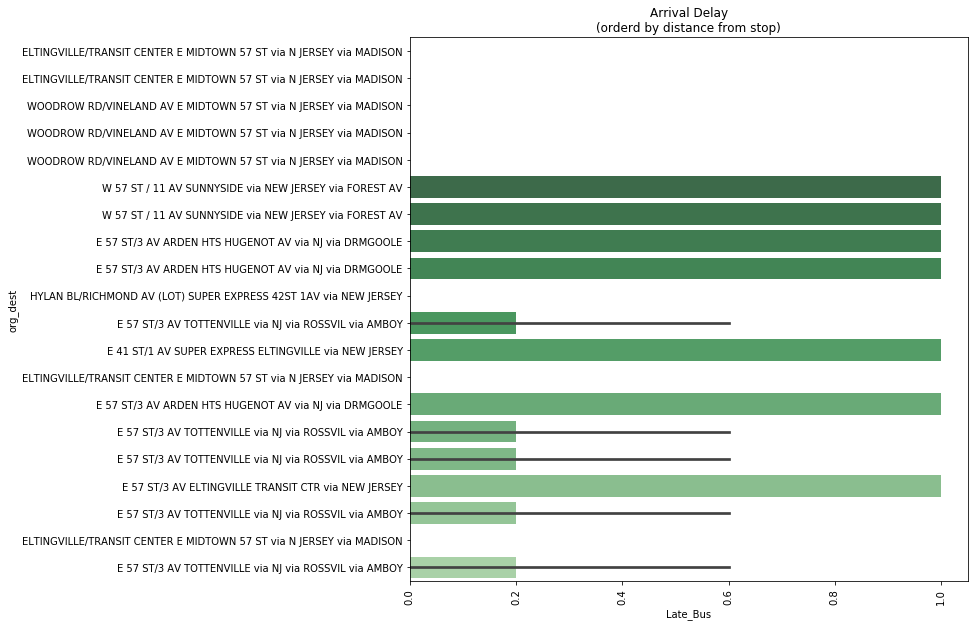

In [279]:
e = mta[['org_dest','Time_delay','Late_Bus','DistanceFromStop']].sort_values(by='DistanceFromStop',ascending=False).head(20)
#w.reset_index(level=0, inplace=True)

plt.figure(figsize=(10,10))
sns.barplot(x='Late_Bus', y='org_dest', data=e, order=e.org_dest, palette="Greens_d")
plt.title('Arrival Delay\n'+'(orderd by distance from stop)')
plt.xticks(rotation=90)
plt.show()

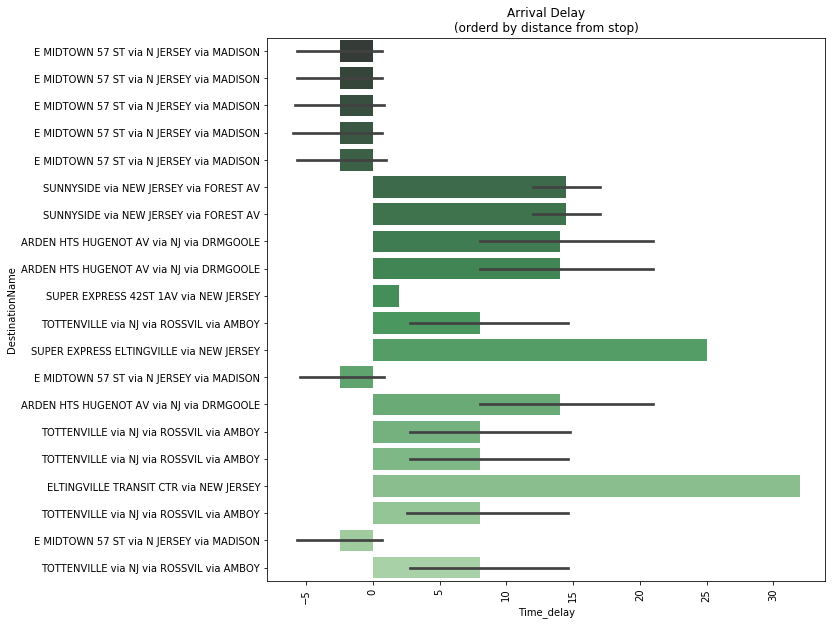

In [278]:
plt.figure(figsize=(10,10))
sns.barplot(x='Time_delay', y='DestinationName', data=w, order=w.DestinationName, palette="Greens_d")
plt.title('Arrival Delay\n'+'(orderd by distance from stop)')
plt.xticks(rotation=90)
plt.show()

In [151]:
order = list(mta.groupby('DestinationName').Late_Bus.mean().sort_values(ascending=False).index)

In [136]:
order = pd.DataFrame(order)

In [129]:
order.reset_index(level=0, inplace=True)

In [121]:
order.sort_values(by='Late_Bus' , ascending=False).reset_index(level=0, inplace=True)

In [303]:
mta.org_dest[:10][1]

'WHITE PLAINS RD/E GUN HILL RD THE HUB 150 ST via WEBSTER'